<sup>6</sup>He(α,α) Simulation Update
=====================
September 16, 2016
--------------------

GEANT4 Process
====

* Last time, we had some issues with the events being biased towards right side detector.
    * I think I have uncovered the reason behind this.
* Simulated elastic events to check and make sure the binary reaction and decay processes are working properly.
* Simulated $^{6}$He on Oxygen and Carbon


In [1]:
import ROOT
from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
import rootprint
import rootnotes
import utils
from IPython.display import Image

In [2]:
ROOT.gROOT.Reset()

In [102]:
#input all the files
inputFile_allAlphas = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldTestNocmELimit.root")
inputFile_recoilAlphas = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldTestNocmELimit_sec1.root")
inputFile_decayAlphas = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldTestNocmELimit_recTrack.root")
inputFile_allAlphasElastic = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldTestNocmELimit_elastic.root")
inputFile_recoilAlphasElastic = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldTestNocmELimit_elastic_sec1Track.root")
inputFile_decayAlphasElastic = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldTestNocmELimit_elastic_recTrack.root")
inputFile_oxygenAlphas = TFile("~/Desktop/rootFiles/he_sim_Oxygen.root")
inputFile_carbonAlphas = TFile("~/Desktop/rootFiles/he_sim_Carbon.root")

In [103]:
#Read in and store all the simData trees into callable functions
allAlphas = inputFile_allAlphas.Get("simData")
recoilAlphas = inputFile_recoilAlphas.Get("simData")
decayAlphas = inputFile_decayAlphas.Get("simData")
allAlphasElastic = inputFile_allAlphasElastic.Get("simData")
recoilAlphasElastic = inputFile_recoilAlphasElastic.Get("simData")
decayAlphasElastic = inputFile_decayAlphasElastic.Get("simData")
oxygenAlphas = inputFile_oxygenAlphas.Get("simData")
carbonAlphas = inputFile_carbonAlphas.Get("simData")

In [5]:
%%rootprint
c1 = rootnotes.canvas("allAlphas",(692*2,472*2))
allAlphas.Draw("siEnergy","siHitMass==4")

# All the $\alpha$ s #
###  Inelastic scattering  ###

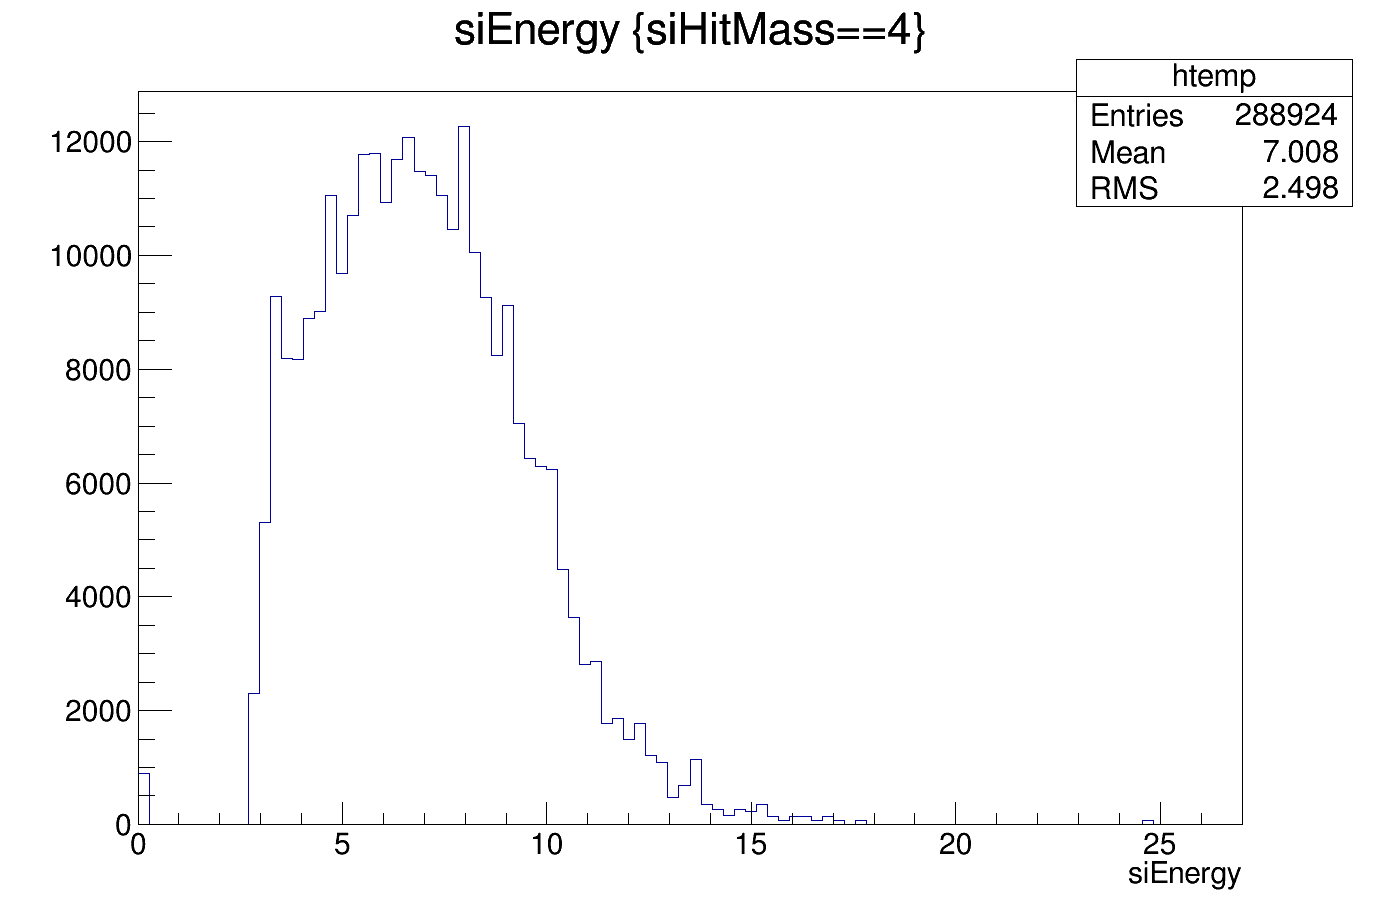

In [6]:
c1

In [ ]:
Image()

In [7]:
%%rootprint
c1_2 = rootnotes.canvas("allAlphasCM",(692*2,472*2))
allAlphas.Draw("cmEnergy")

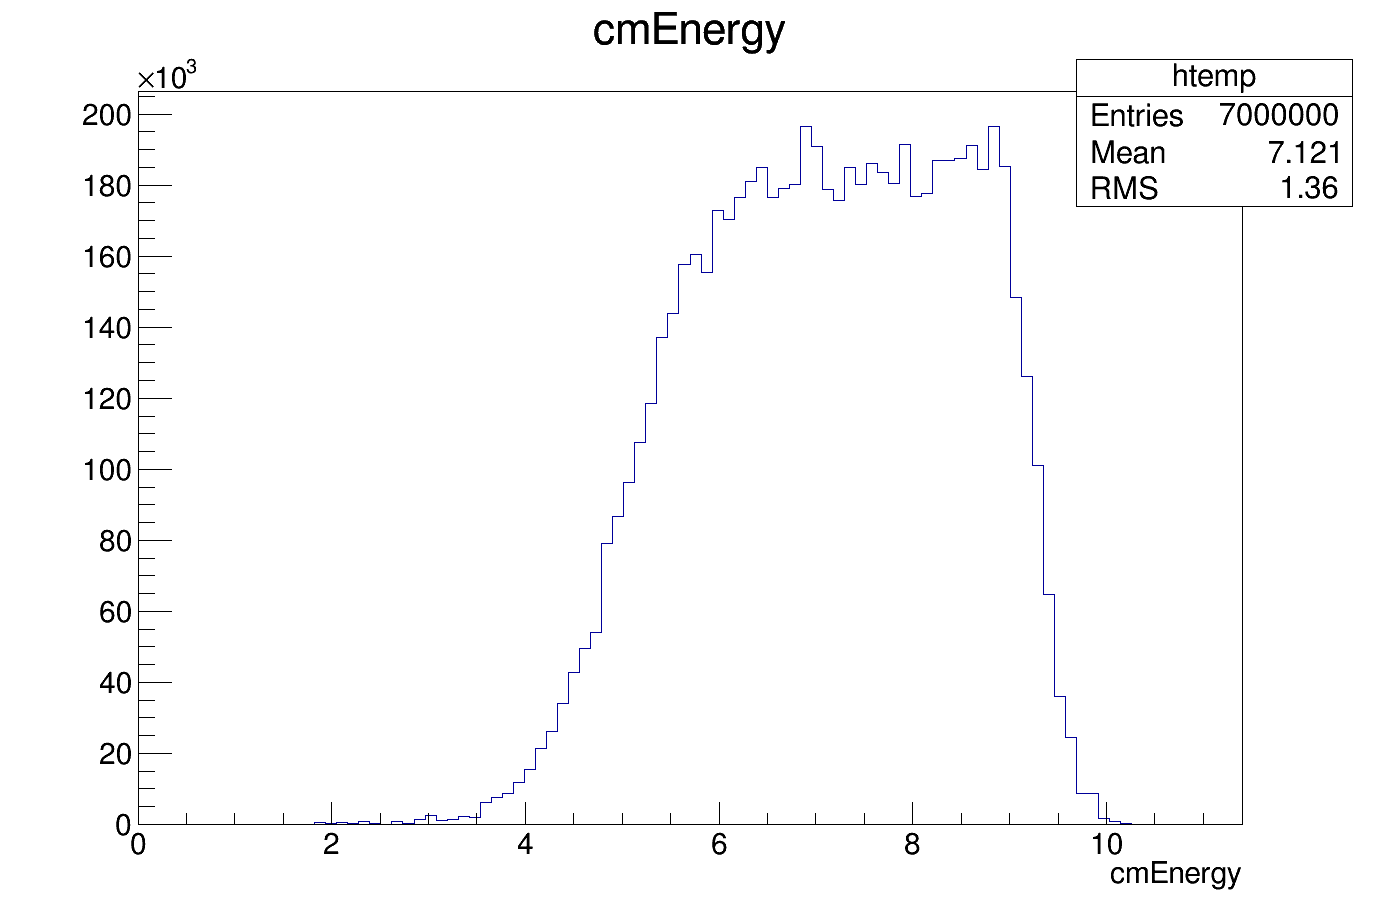

In [8]:
c1_2

In [9]:
%%rootprint
c2 = rootnotes.canvas("recoilAlphas", (696*2,472*2))
recoilAlphas.Draw("siEnergy", "siHitMass==4")

# Recoil $\alpha$ s #
###  Inelastic scattering  ###

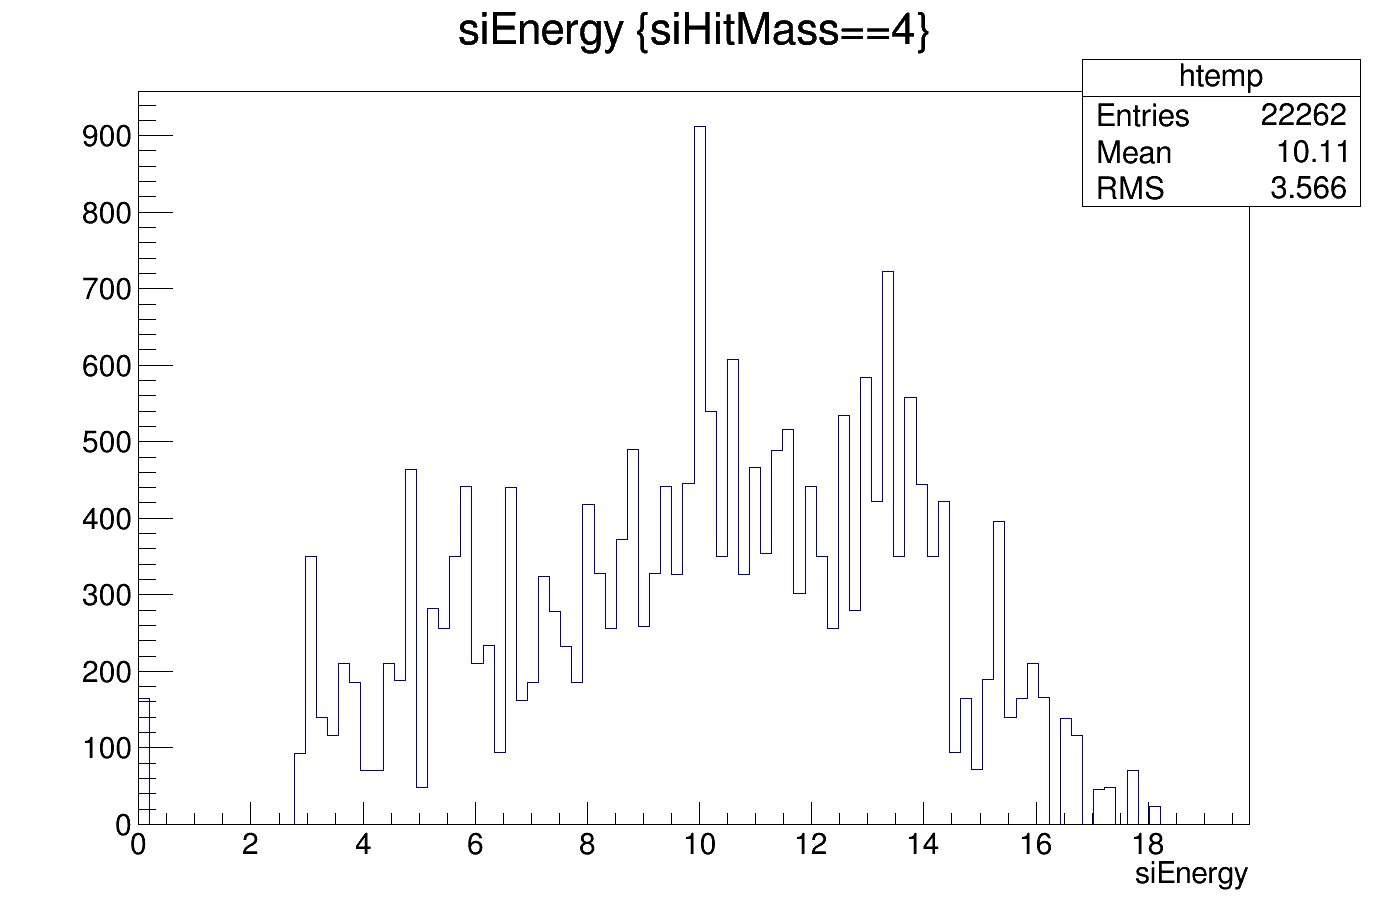

In [10]:
c2

In [11]:
%%rootprint
c2_2 = rootnotes.canvas("recoilAlphas_det",(696*4,472*2))
c2_2.Divide(2)
c2_2.cd(1)
recoilAlphas.Draw("cmEnergy")
c2_2.cd(2)
recoilAlphas.Draw("siDetector","siHitMass==4")

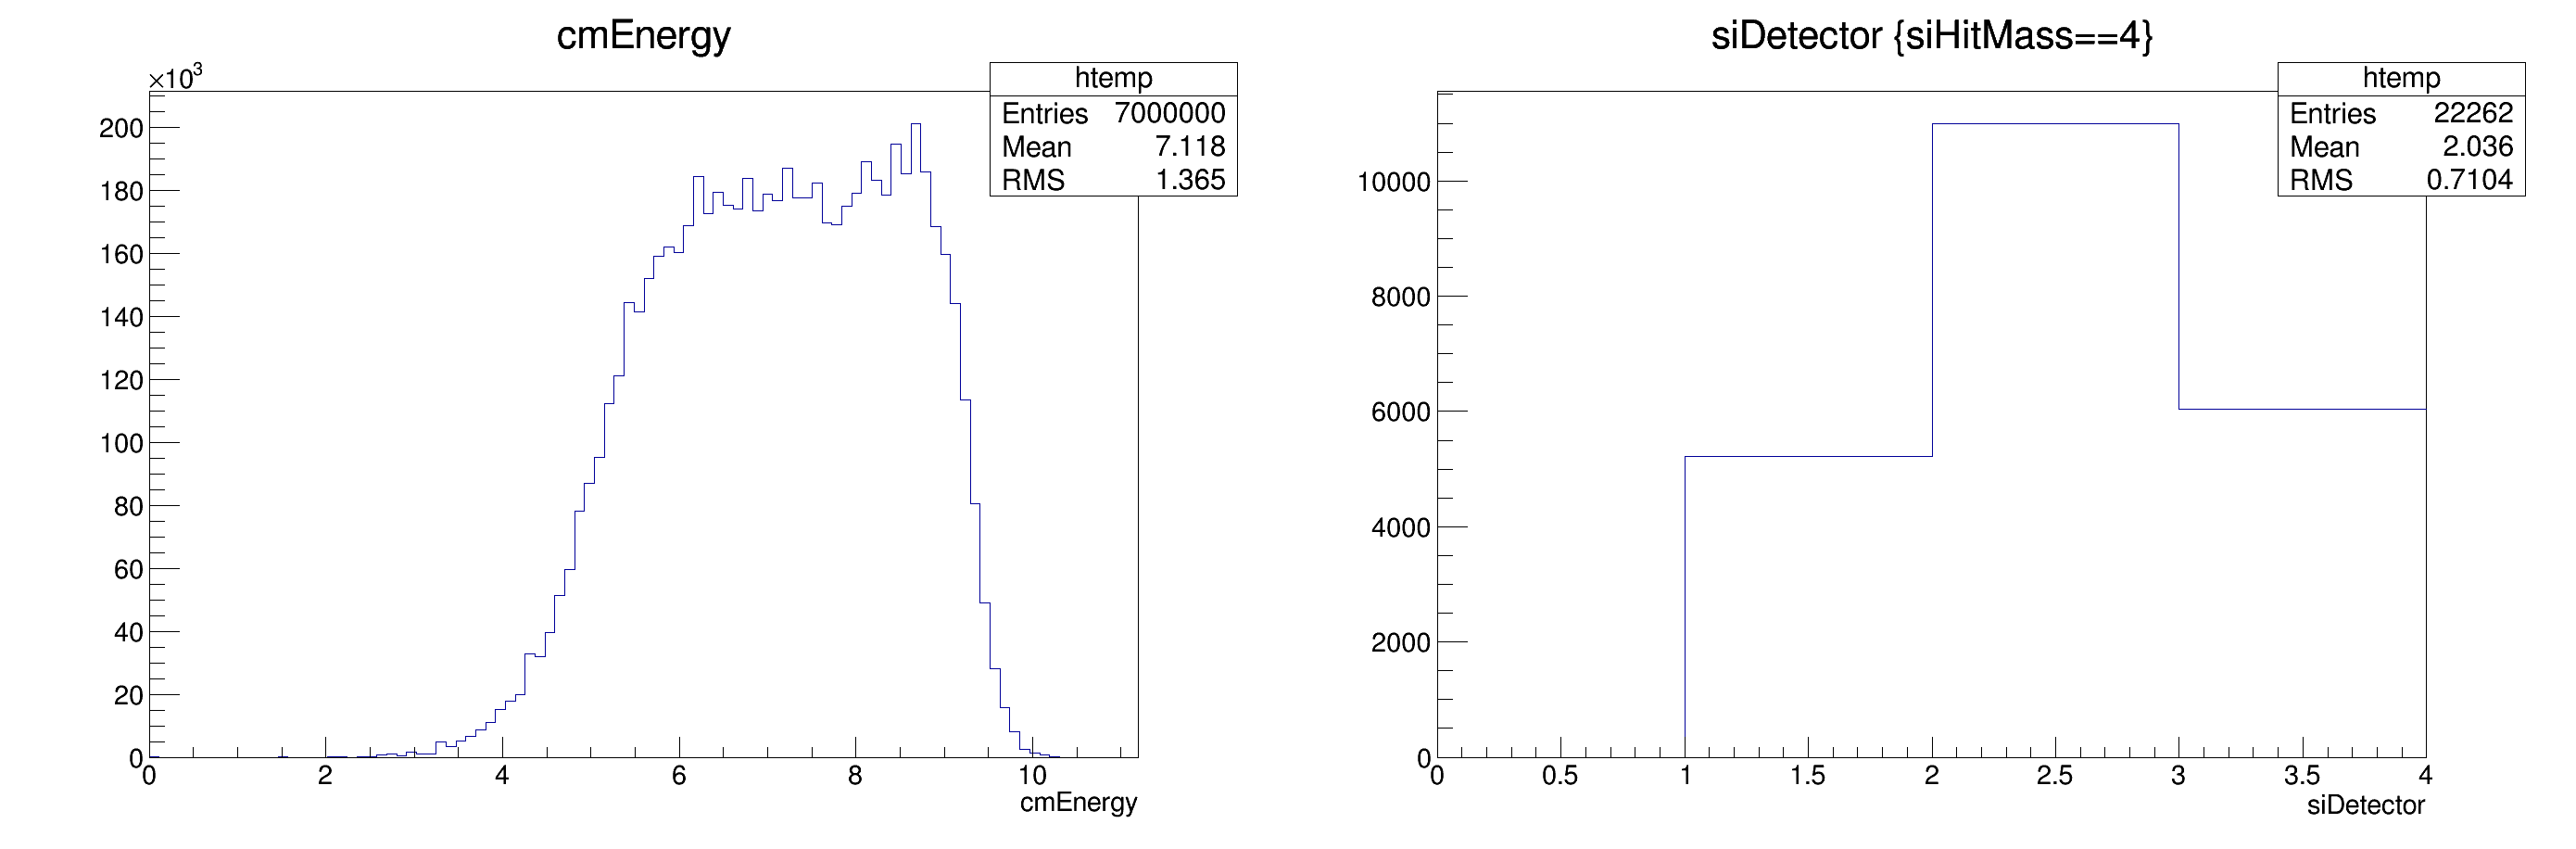

In [12]:
c2_2

The issue I had with the detectors not being balanced seems to be fine here... but we'll revisit this issue shortly.
------

In [13]:
%%rootprint
c3 = rootnotes.canvas("decayAlphas", (696*2,472*2))
decayAlphas.Draw("siEnergy", "siHitMass==4")

# Decay $\alpha$ s #
###  Inelastic scattering  ###

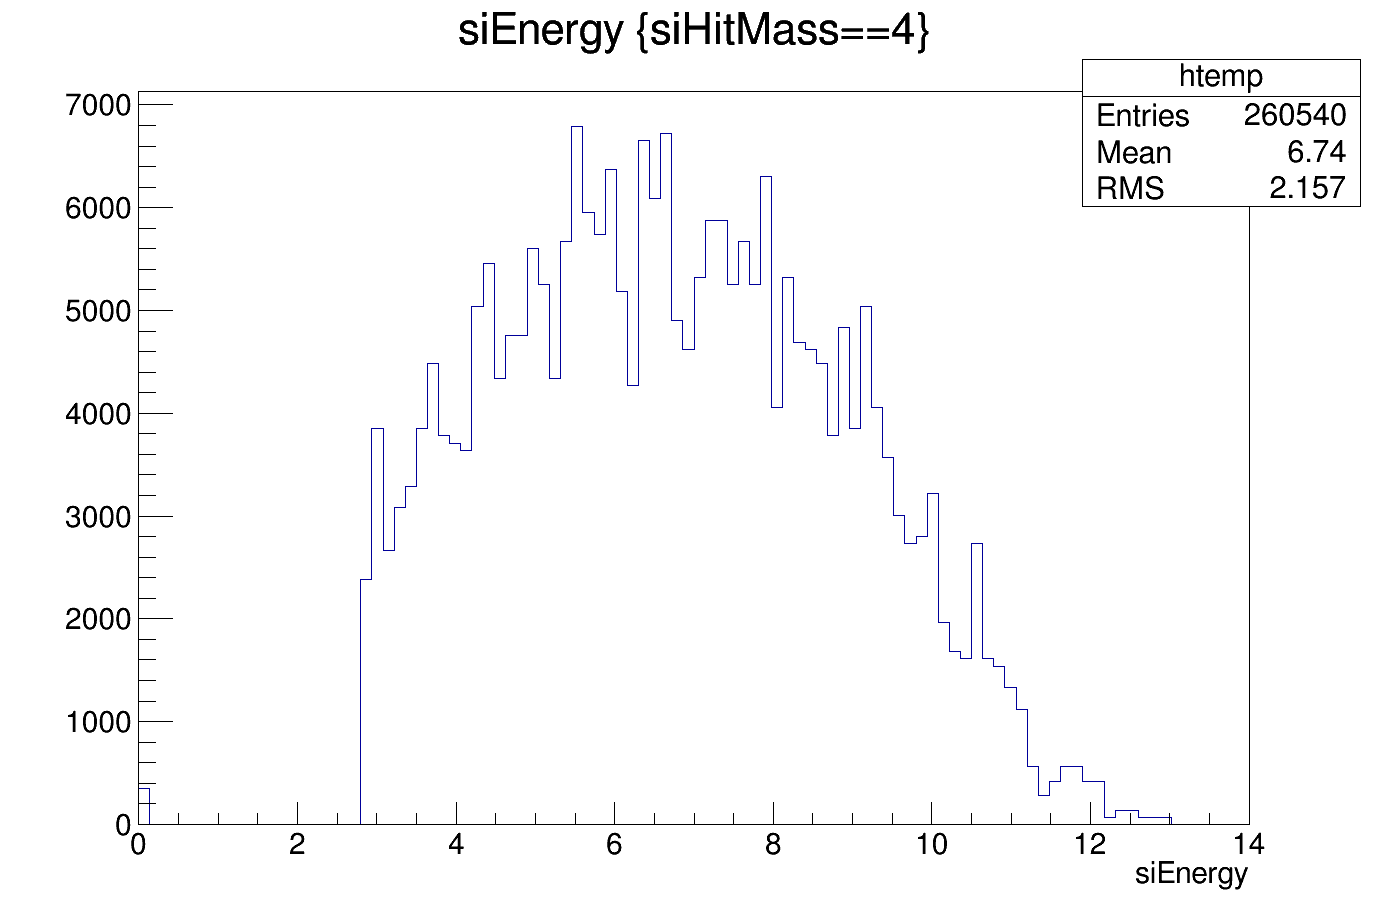

In [14]:
c3

In [15]:
%%rootprint
c3_2 = rootnotes.canvas("decayAlphas_det",(696*4,472*2))
c3_2.Divide(2)
c3_2.cd(1)
decayAlphas.Draw("cmEnergy")
c3_2.cd(2)
decayAlphas.Draw("siDetector","siHitMass==4")

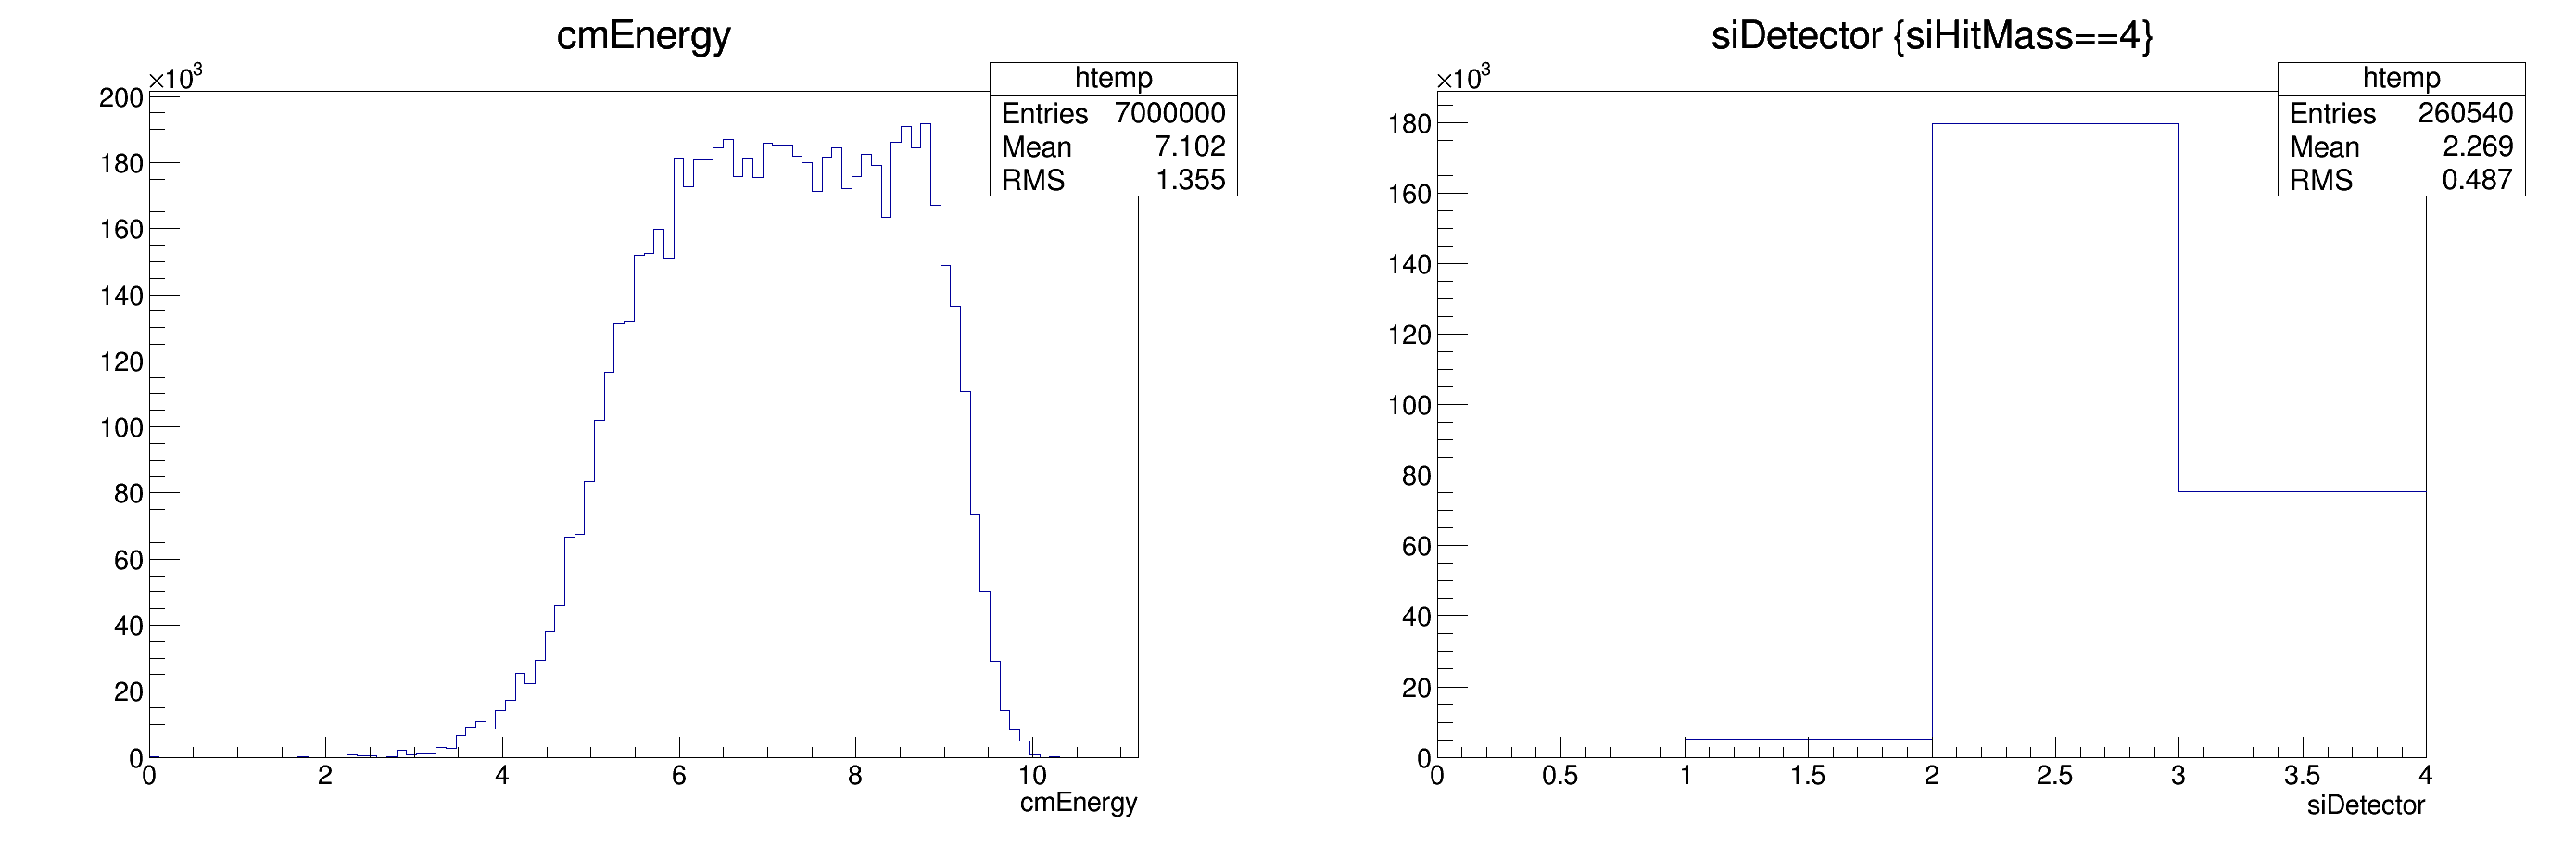

In [16]:
c3_2

We can see that the issue with the detectors is back here. We can see that this only happens with the decay process. I suspect the definitions of the decay process with the 4-vectors are at fault?
-----
Just realized this could be the issue this morning. I haven't had the time to investigate it further.

In [17]:
%%rootprint
c4 = rootnotes.canvas("allAlphasElastic",(692*2,472*2))
allAlphasElastic.Draw("siEnergy","siHitMass==4")

# All the $\alpha$ s #
###  Elastic scattering  ###
##### This is done as a test to make sure the binary reaction process is handles the decay well when a q-Value = 0 is entered #####

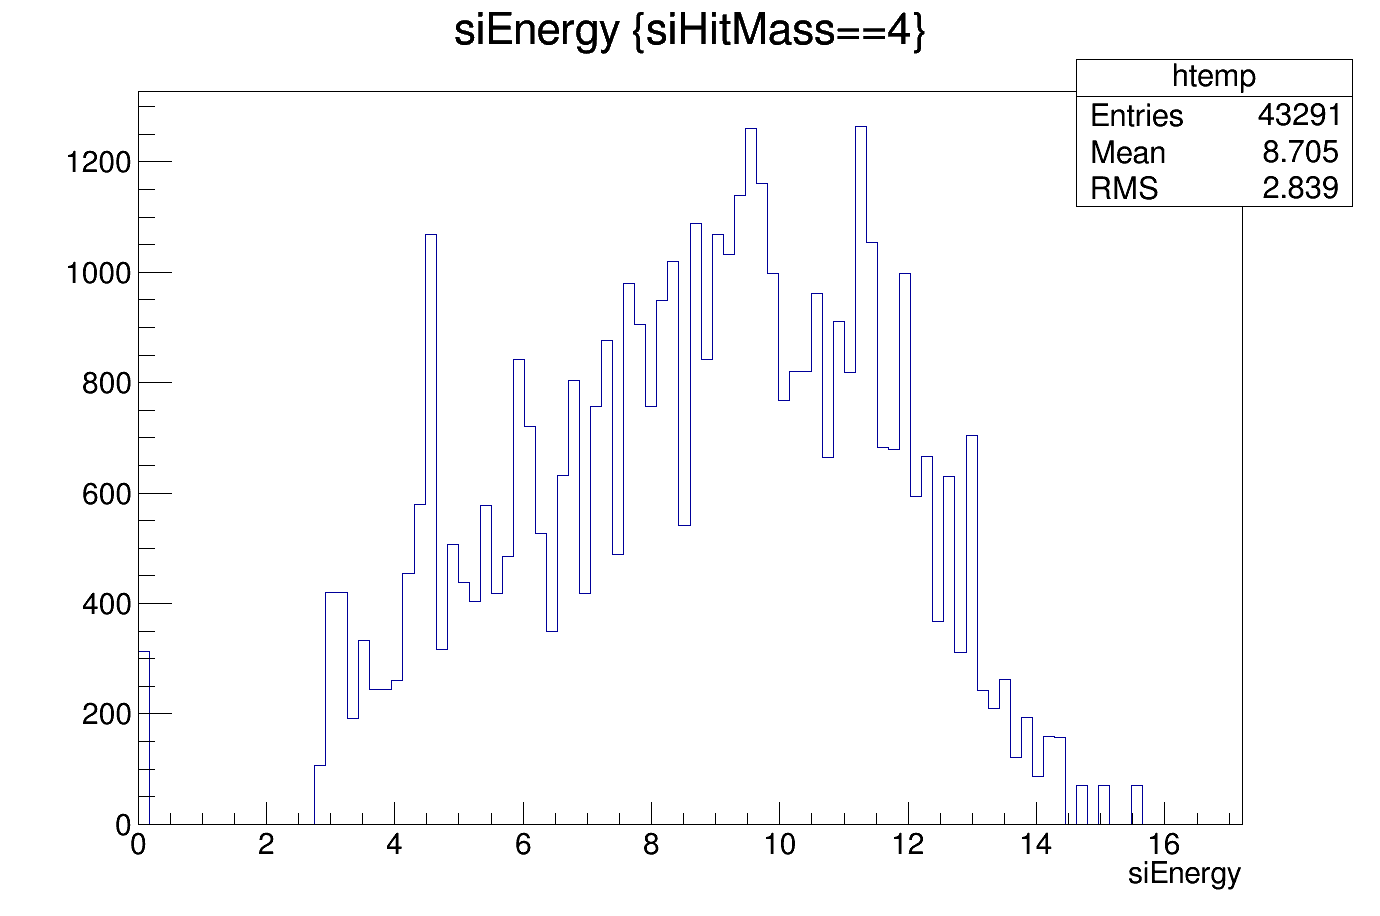

In [18]:
c4

In [19]:
%%rootprint
c4_2 = rootnotes.canvas("allAlphasElastic_det",(696*4,472*4))
c4_2.Divide(2,2)
c4_2.cd(1)
allAlphasElastic.Draw("cmEnergy")
c4_2.cd(2)
allAlphasElastic.Draw("siDetector","siHitMass==4")
c4_2.cd(3)
allAlphasElastic.Draw("vertexPosition[2]:cmEnergy","","colz")
c4_2.cd(4)
allAlphasElastic.Draw("siEnergy:cmEnergy","siHitMass==4","colz")

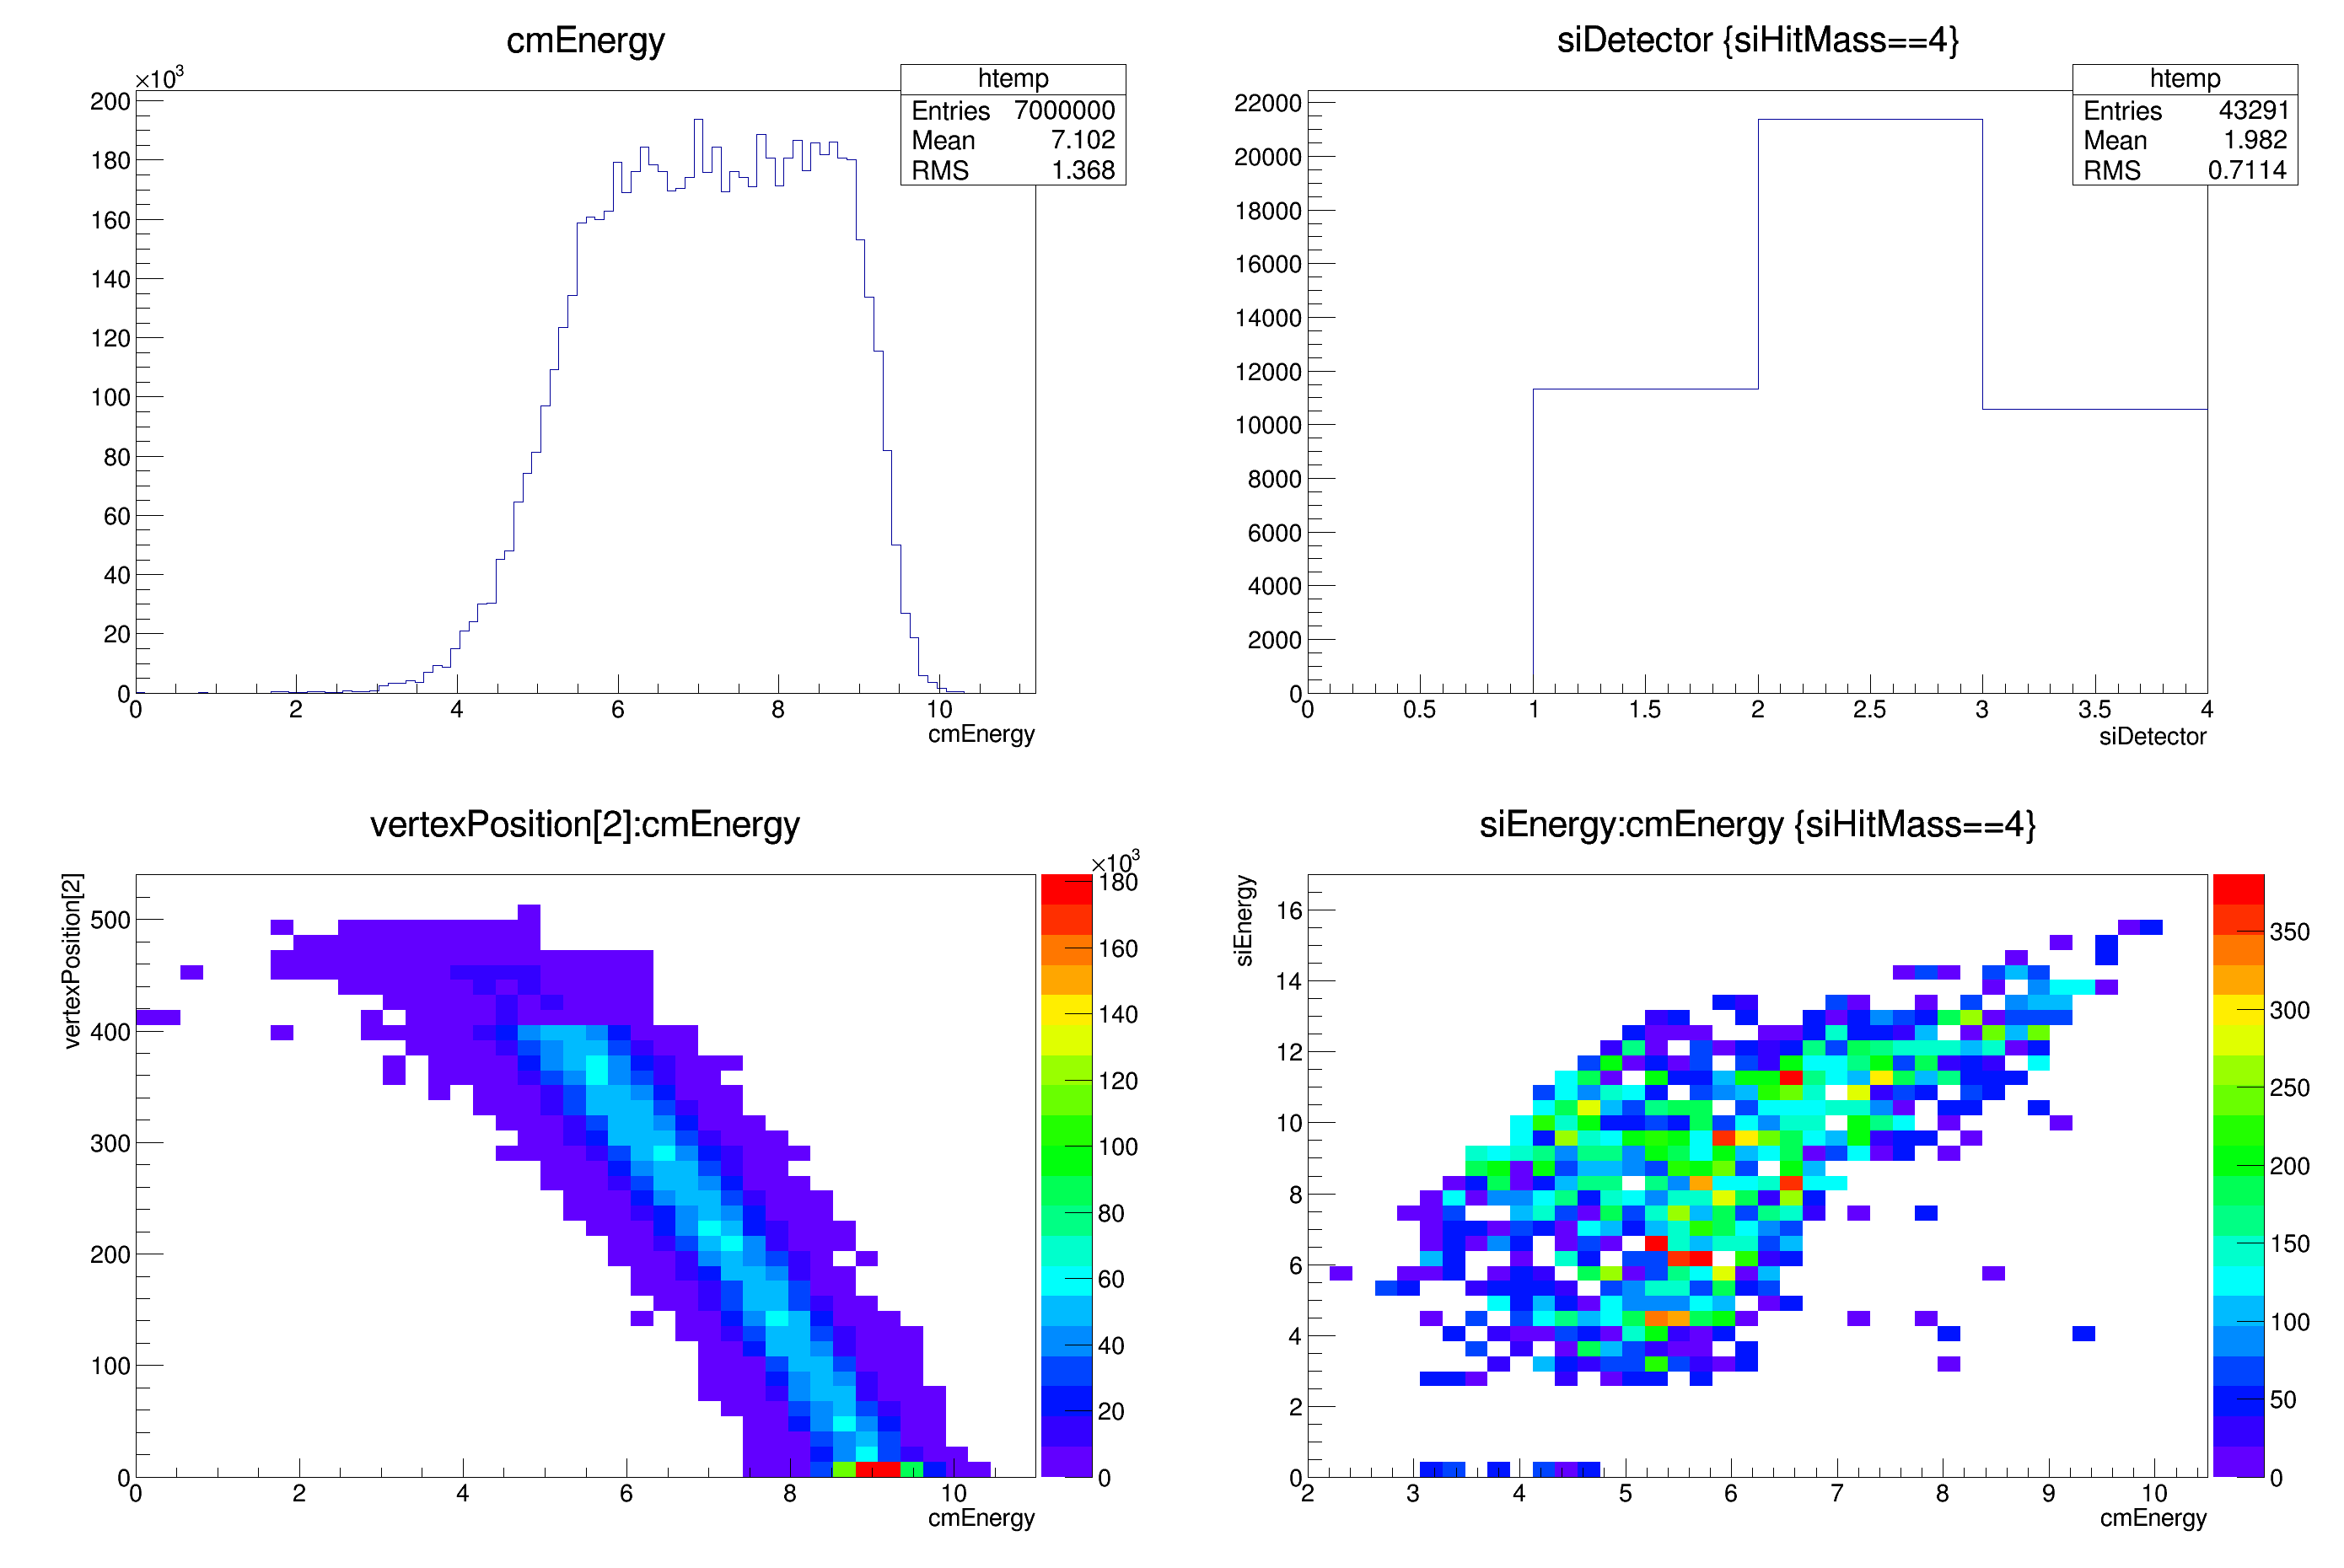

In [20]:
c4_2

In [21]:
%%rootprint
c5 = rootnotes.canvas("recoilAlphasElastic",(692*2,472*2))
recoilAlphasElastic.Draw("siEnergy","siHitMass==4")

Recoil $\alpha$ s track
====
Elastic scattering
----

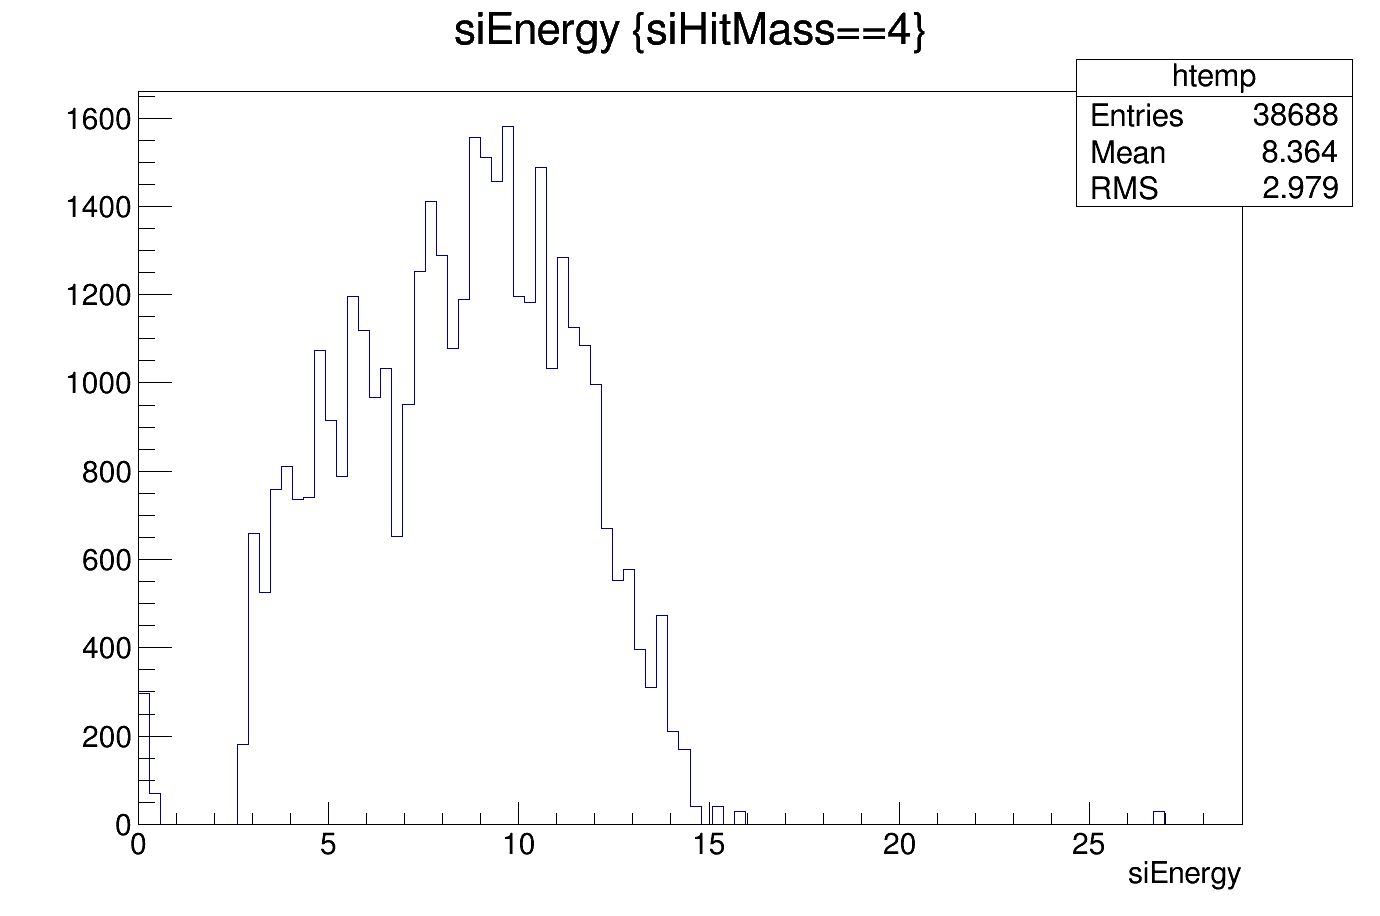

In [22]:
c5

In [23]:
%%rootprint
c5_2 = rootnotes.canvas("recoilAlphasElastic_det",(696*4,472*4))
c5_2.Divide(2,2)
c5_2.cd(1)
recoilAlphasElastic.Draw("cmEnergy")
c5_2.cd(2)
recoilAlphasElastic.Draw("siDetector","siHitMass==4")
c5_2.cd(3)
recoilAlphasElastic.Draw("vertexPosition[2]:cmEnergy","","colz")
c5_2.cd(4)
recoilAlphasElastic.Draw("siEnergy:cmEnergy","siHitMass==4","colz")

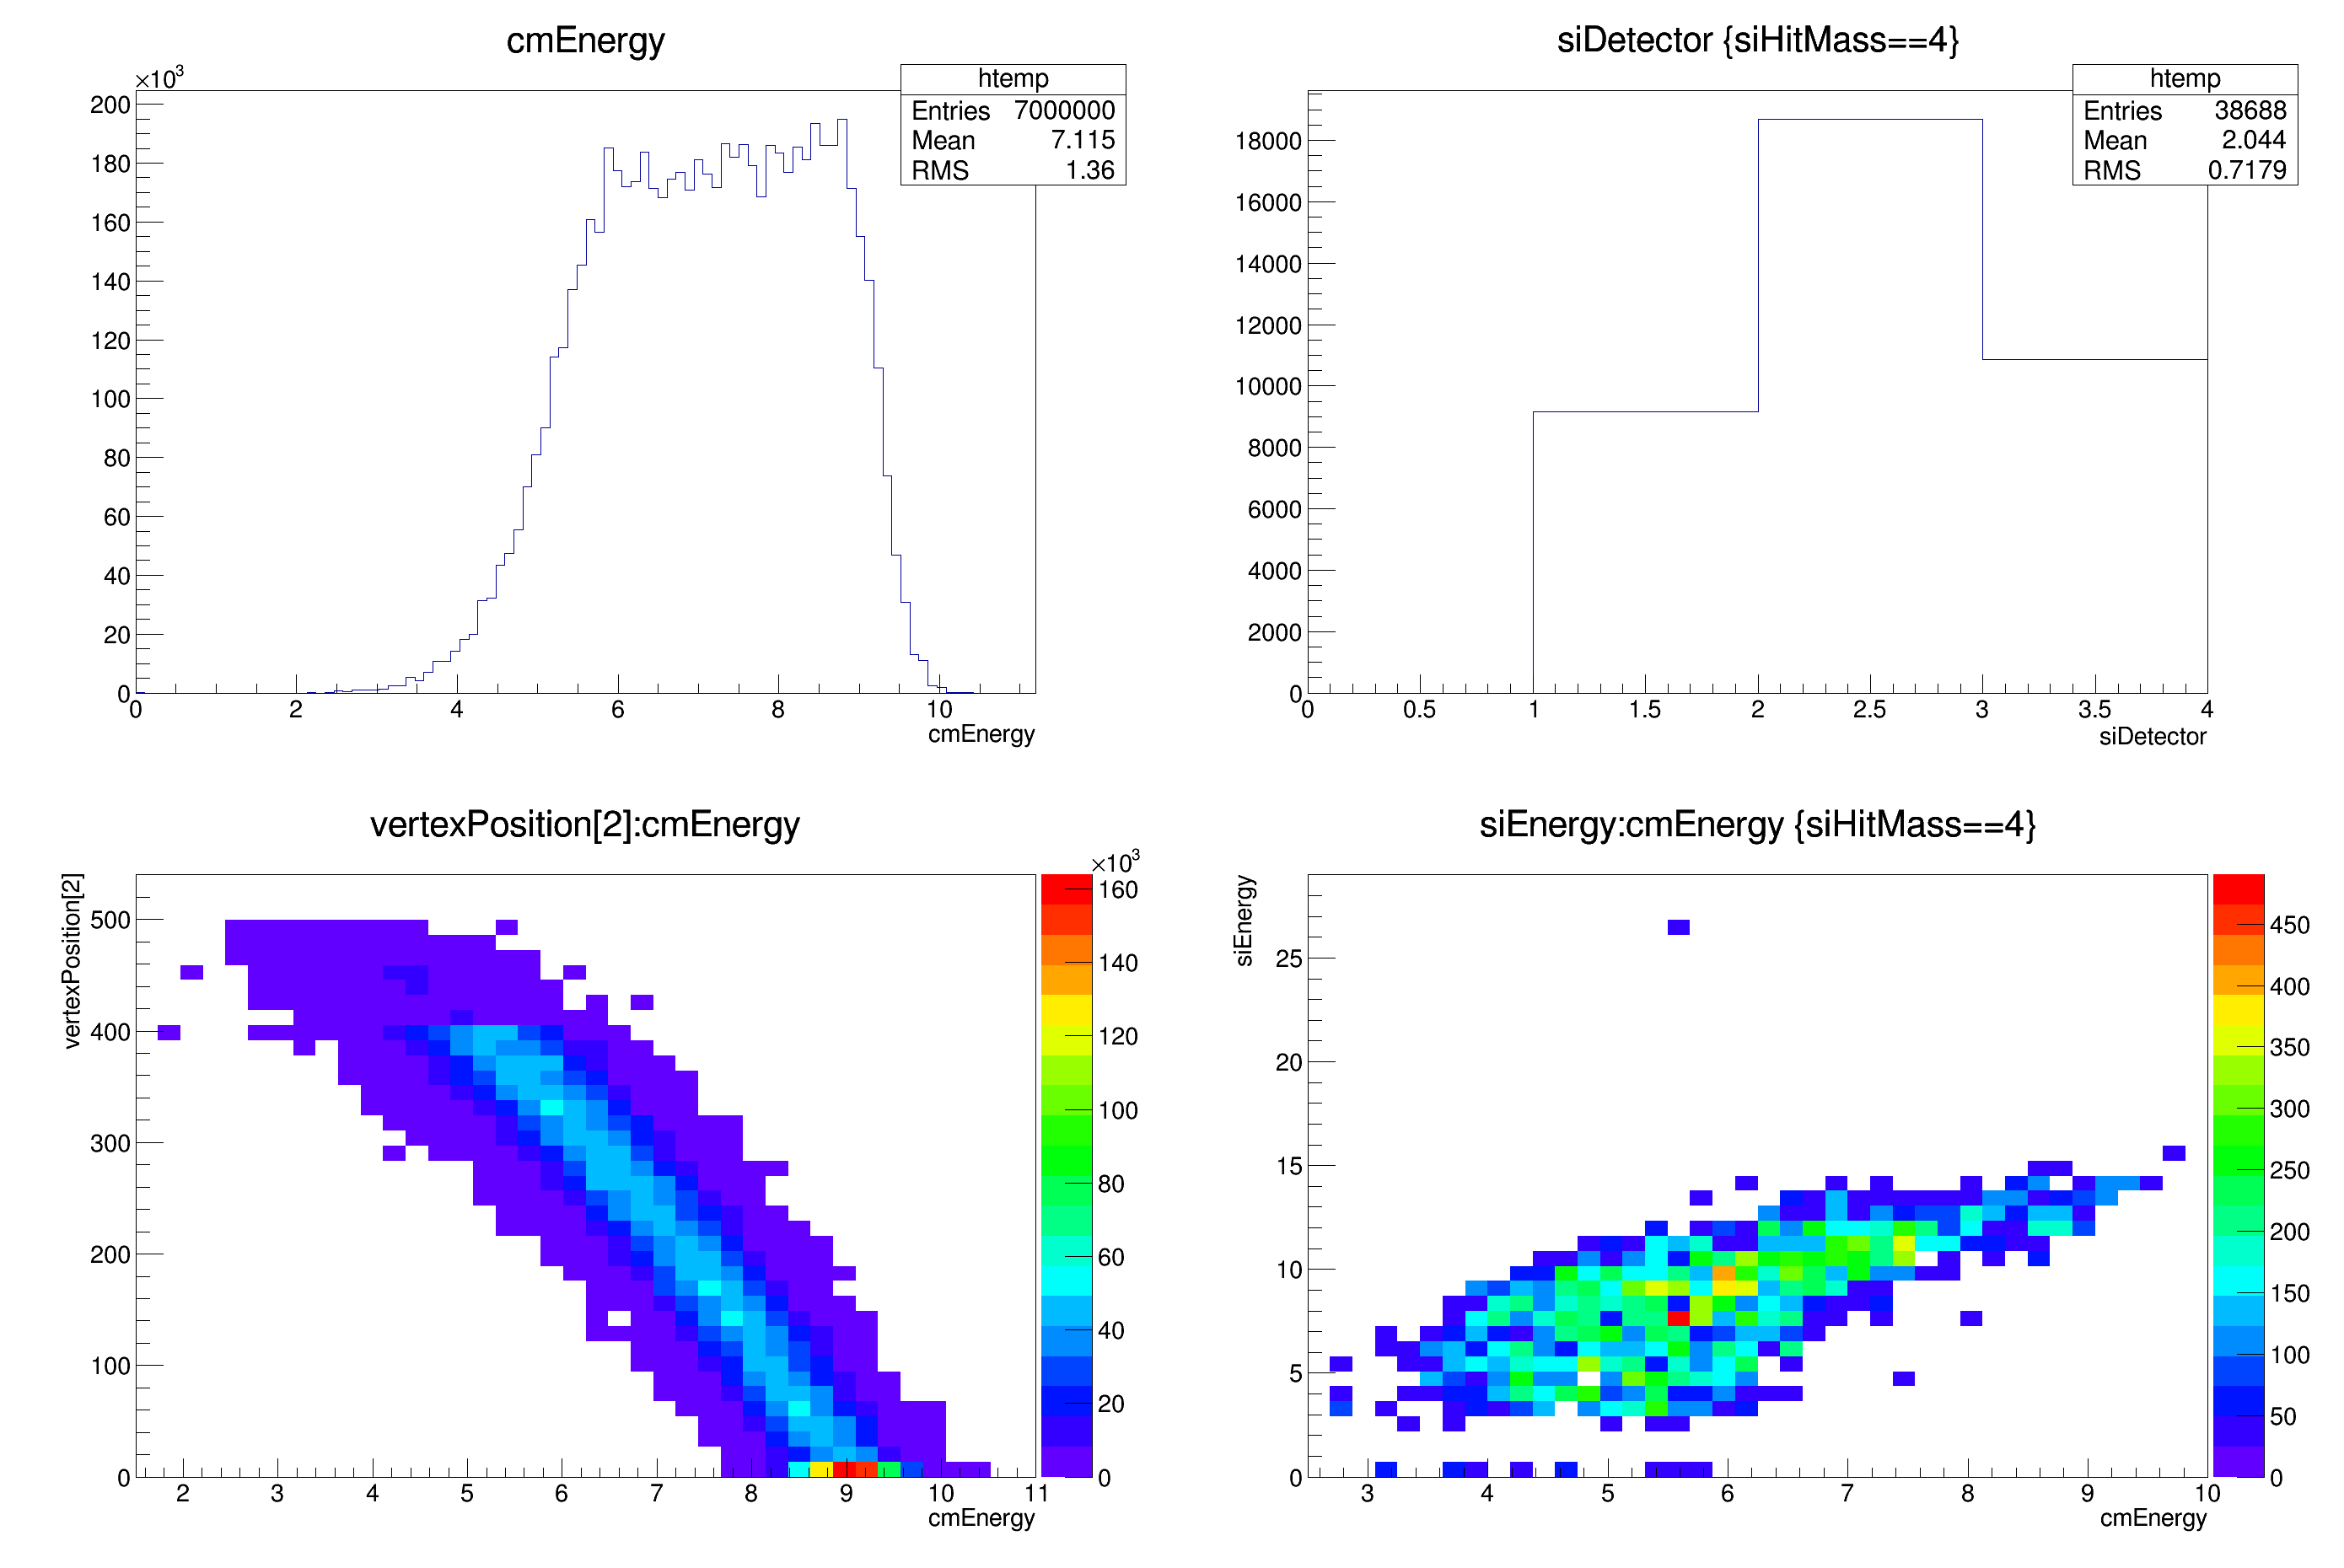

In [24]:
c5_2

In [50]:
%%rootprint
c6 = rootnotes.canvas("decayAlphasElastic",(692*4,472*2))
c6.Divide(2)
c6.cd(1)
decayAlphasElastic.Draw("siEnergy")
c6.cd(2)
decayAlphasElastic.Draw("siEnergy","siHitMass==4")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: decayAlphasElastic


Decay $\alpha$ s track
====
Elastic scattering
----

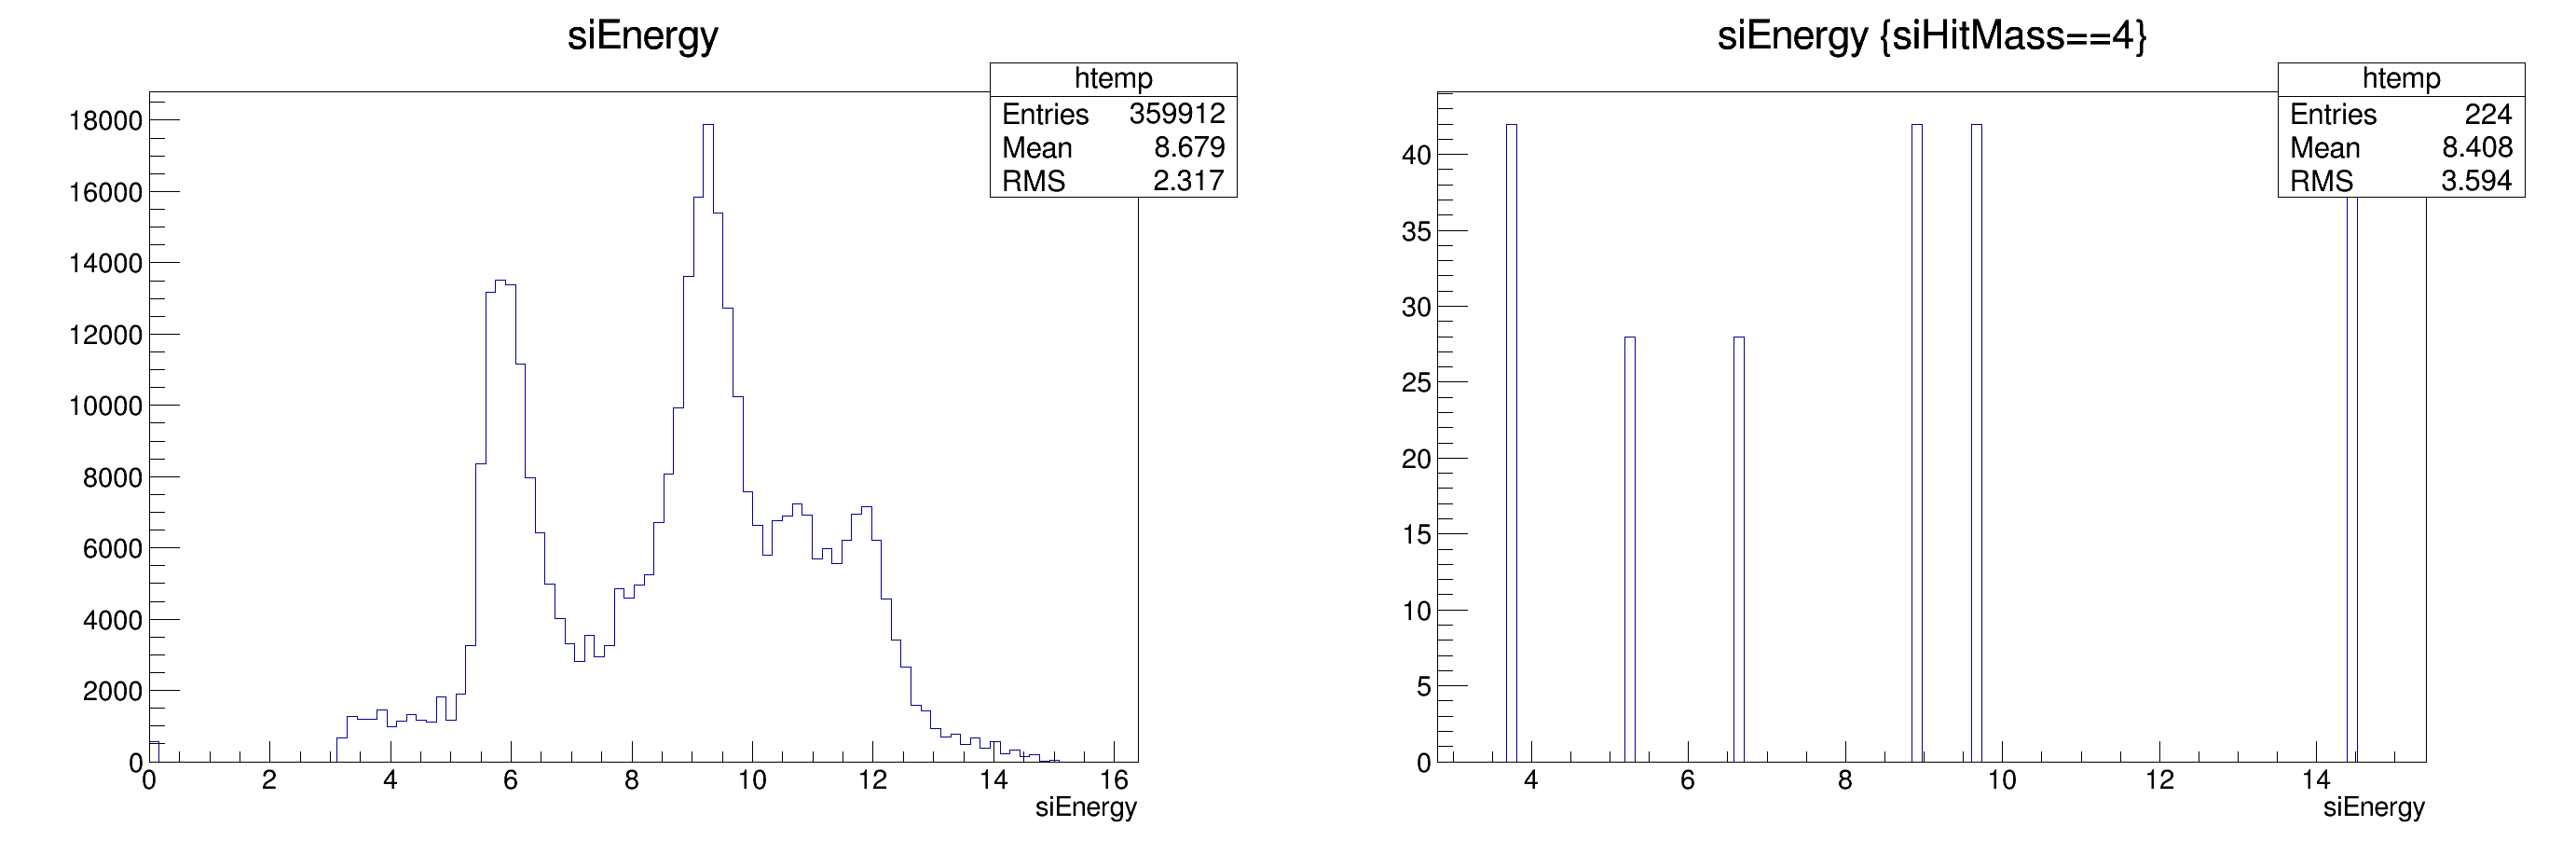

In [51]:
c6

We can barely see any $\alpha$s here, which is consistant with what we expect. However, There are multiple significant peaks in the energy spectrum that I am not entirely sure about...
----

In [54]:
%%rootprint
c6_1 = rootnotes.canvas("decayAlphasElastic_det2",(692*4,472*6))
c6_1.Divide(2,3)
c6_1.cd(1)
decayAlphasElastic.Draw("siDetector")
c6_1.cd(2)
decayAlphasElastic.Draw("siEnergy","siDetector==1")
c6_1.cd(3)
decayAlphasElastic.Draw("siEnergy","siDetector==2 && siQuadrant==1")
c6_1.cd(4)
decayAlphasElastic.Draw("siEnergy","siDetector==2 && siQuadrant==2")
c6_1.cd(5)
decayAlphasElastic.Draw("siEnergy","siDetector==2 && siQuadrant==3")
c6_1.cd(6)
decayAlphasElastic.Draw("siEnergy","siDetector==2 && siQuadrant==4")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: decayAlphasElastic_det2


* So... I investigated
----
    * Thought it could be related to the detectors/quadrants it hits
----

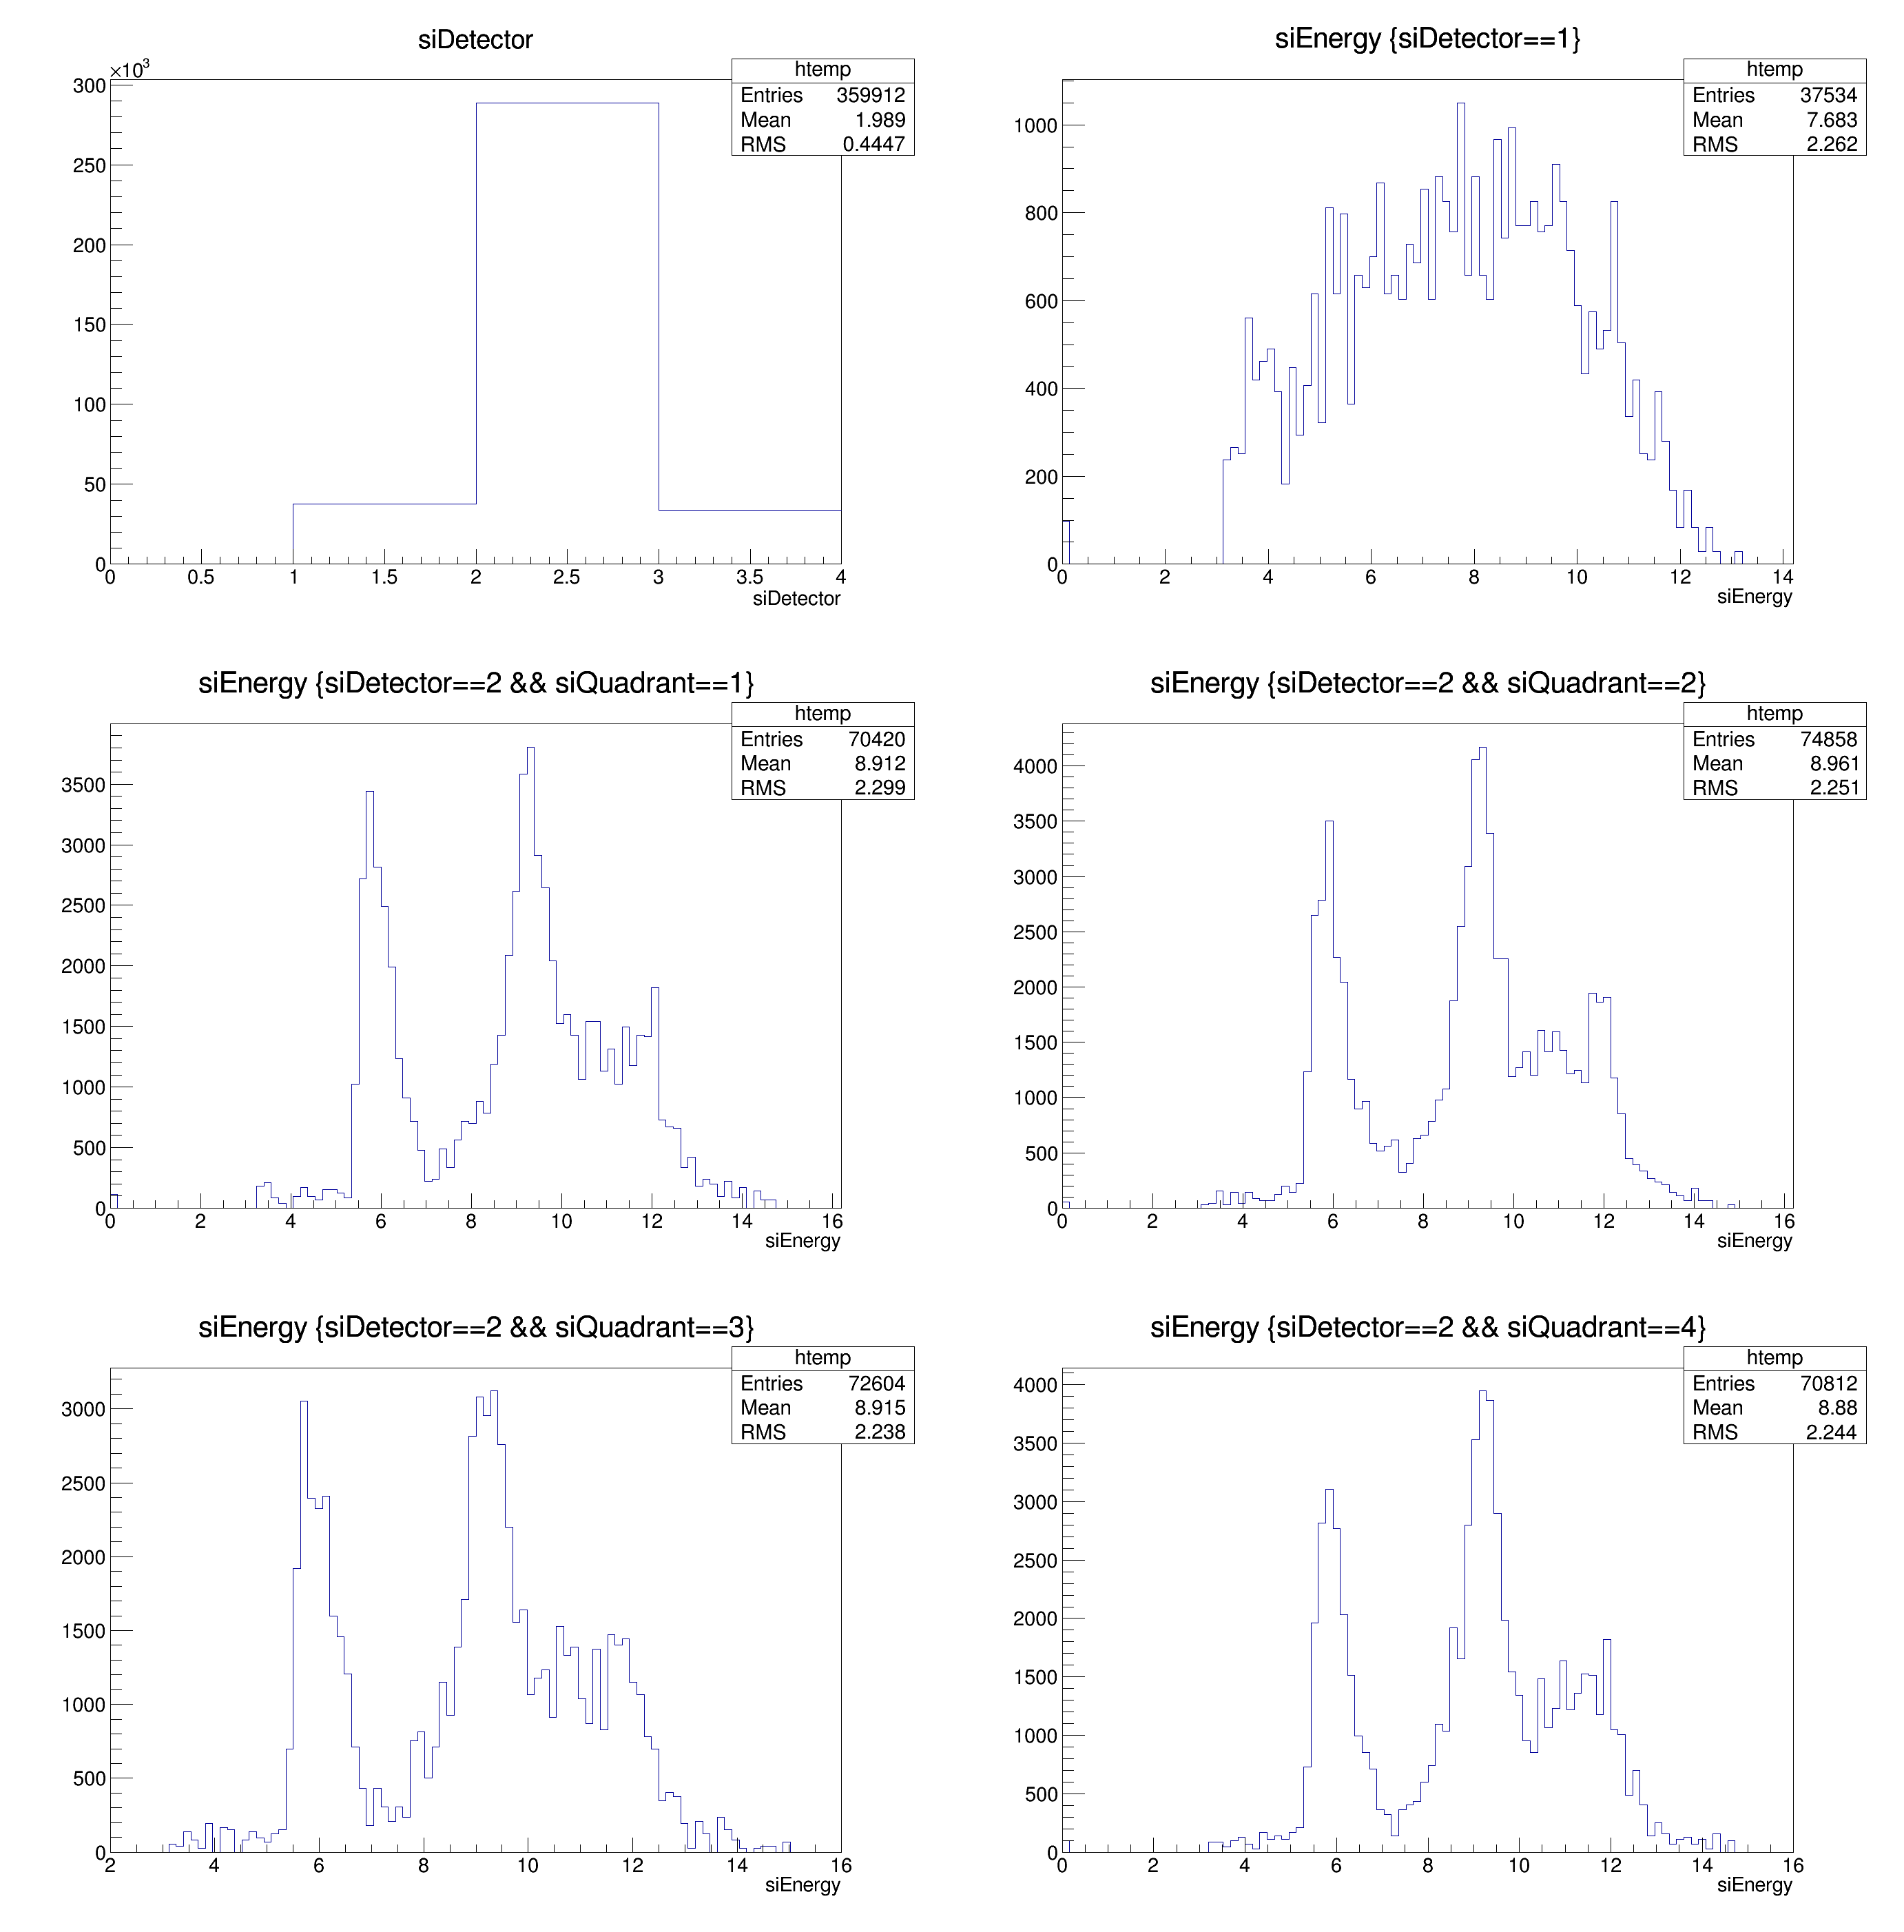

In [55]:
c6_1

In [64]:
%%rootprint
c6_2 = rootnotes.canvas("decayAlphasElastic_det",(696*4,472*4))
c6_2.Divide(2,2)
c6_2.cd(1)
decayAlphasElastic.Draw("cmEnergy")
c6_2.cd(2)
decayAlphasElastic.Draw("siDetector","siHitMass==4")
c6_2.cd(3)
decayAlphasElastic.Draw("siEnergy:cmEnergy","","colz")
c6_2.cd(4)
decayAlphasElastic.Draw("siHitMass")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: decayAlphasElastic_det


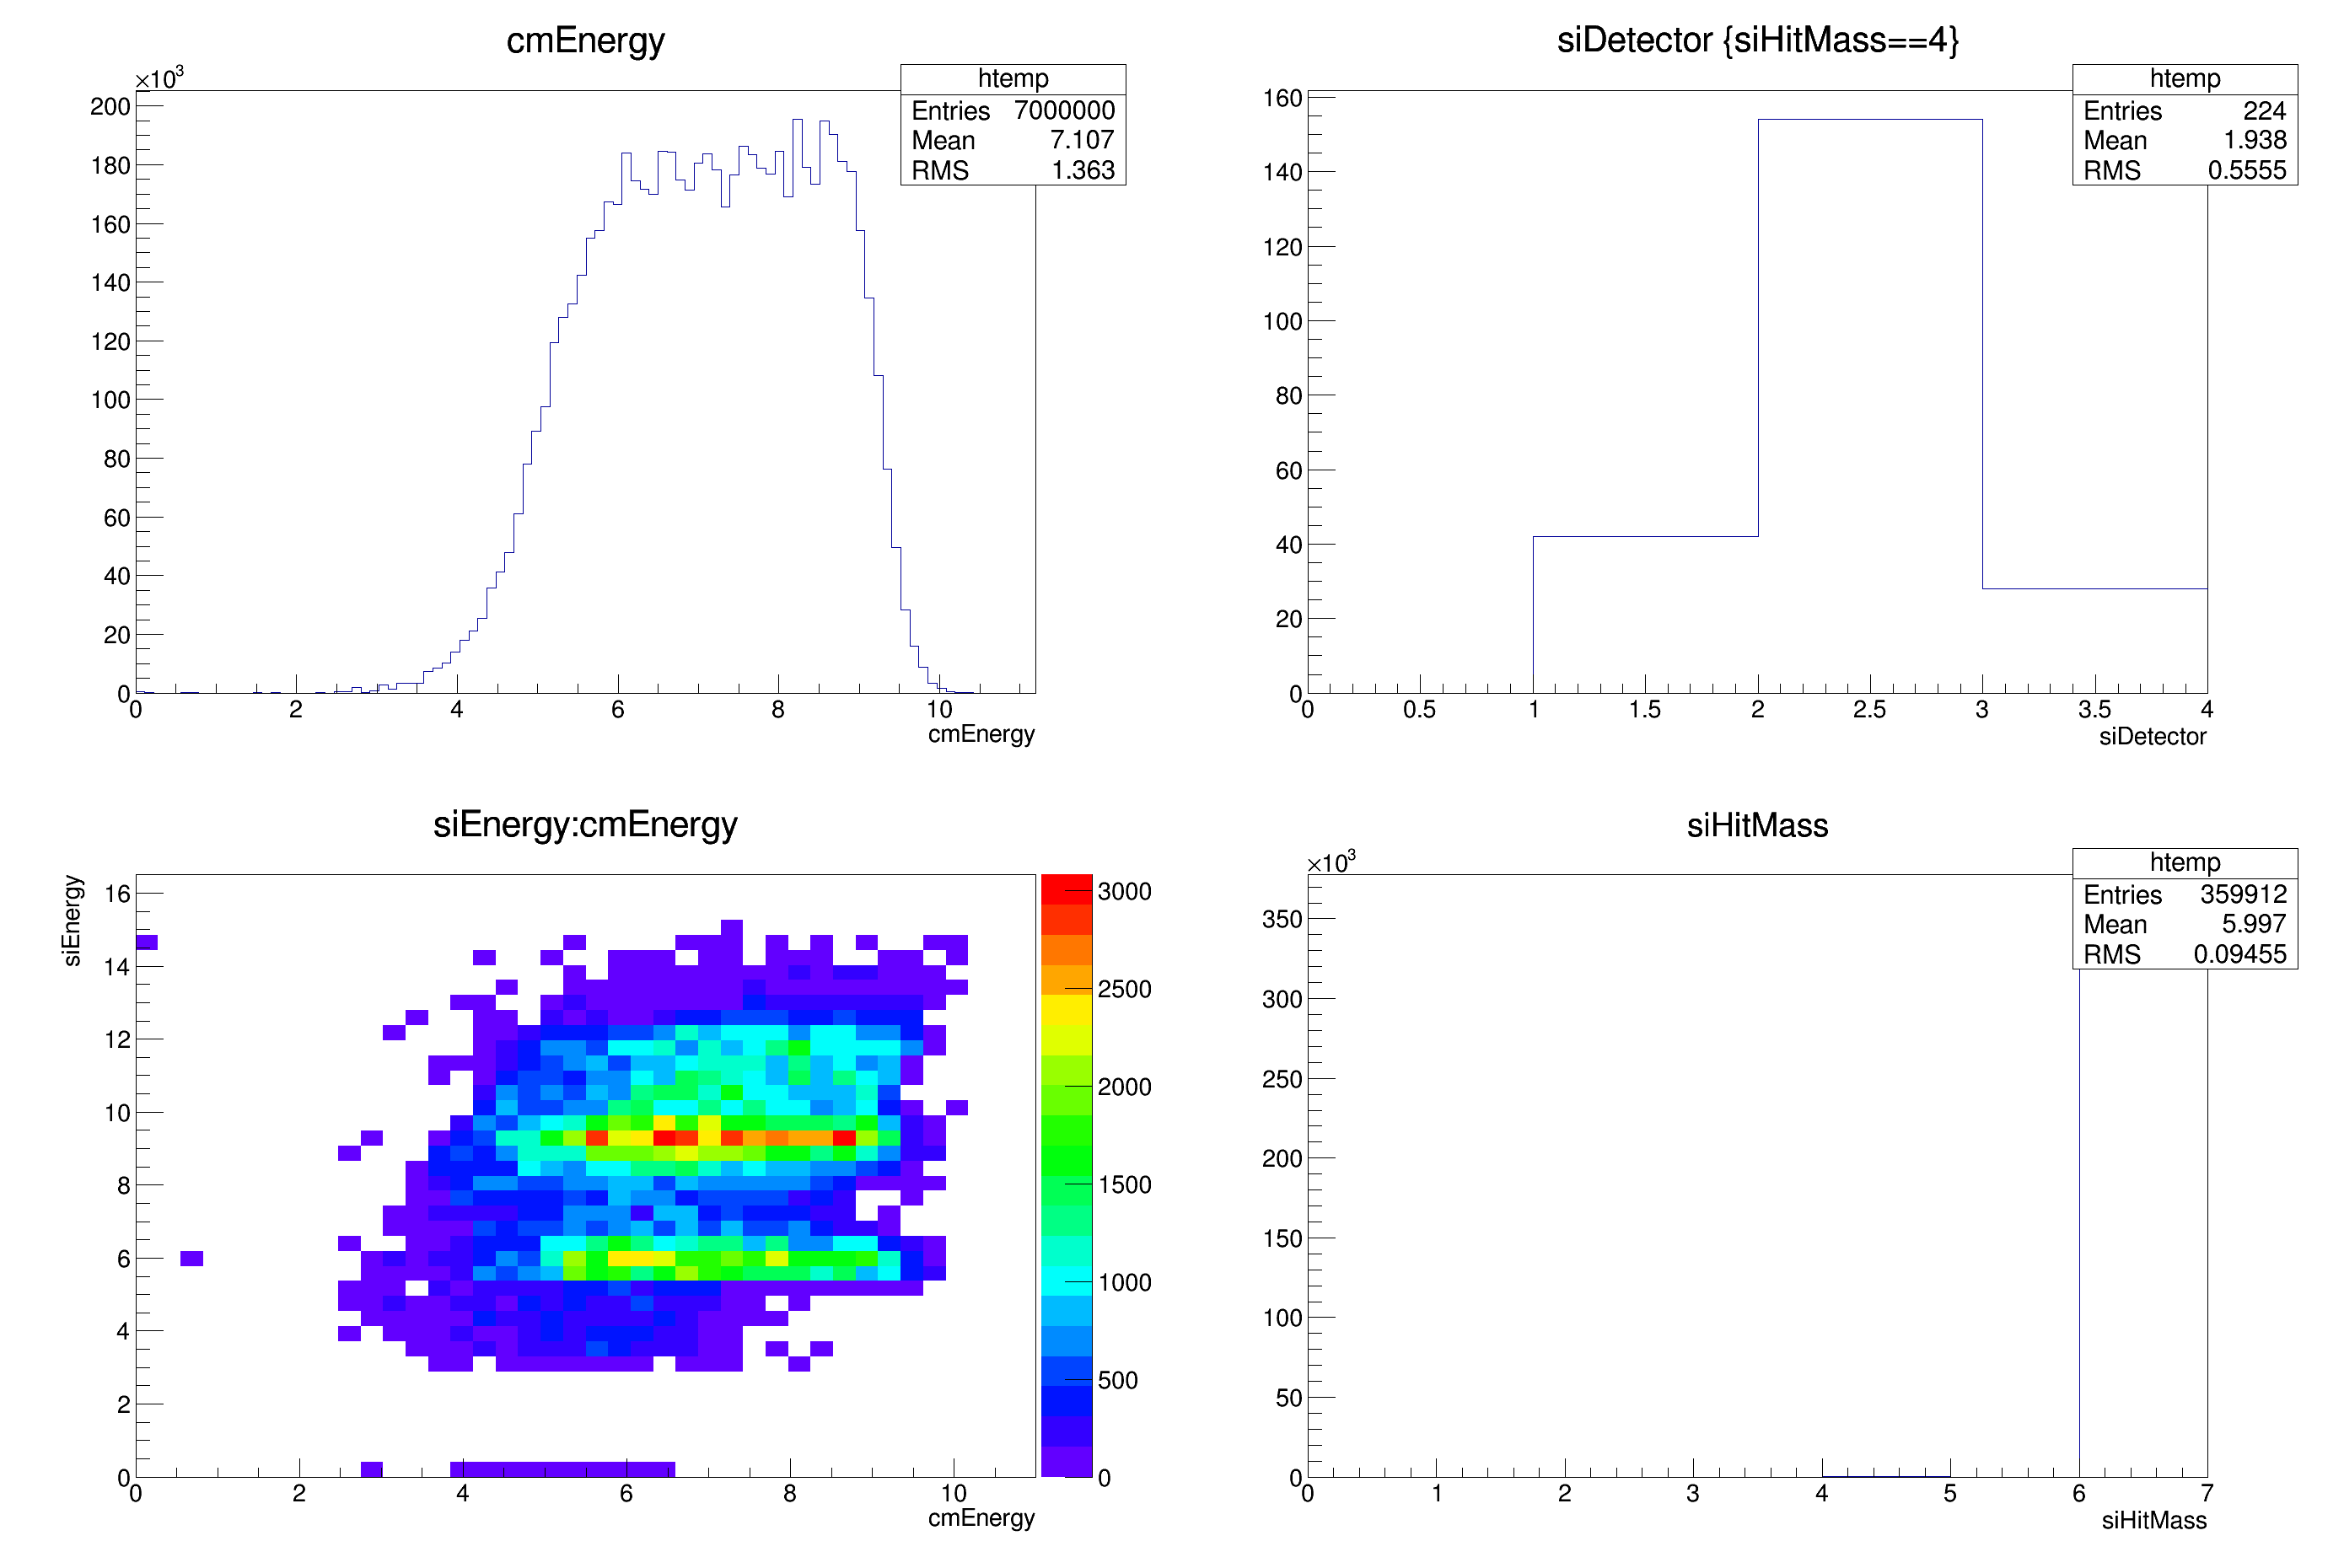

In [65]:
c6_2

In [76]:
%%rootprint
c7 = rootnotes.canvas("oxygen",(692*4,472*4))
c7.Divide(2,2)
c7.cd(1)
oxygenAlphas.Draw("siEnergy","siHitMass==4")
c7.cd(2)
oxygenAlphas.Draw("siEnergy","siHitMass==6")
c7.cd(3)
oxygenAlphas.Draw("siEnergy","siHitMass==16")
c7.cd(4)
oxygenAlphas.Draw("siEnergy")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: oxygen


$^{6}$He$(^{16}$O,$\alpha)$
====
Inlastic scattering
----

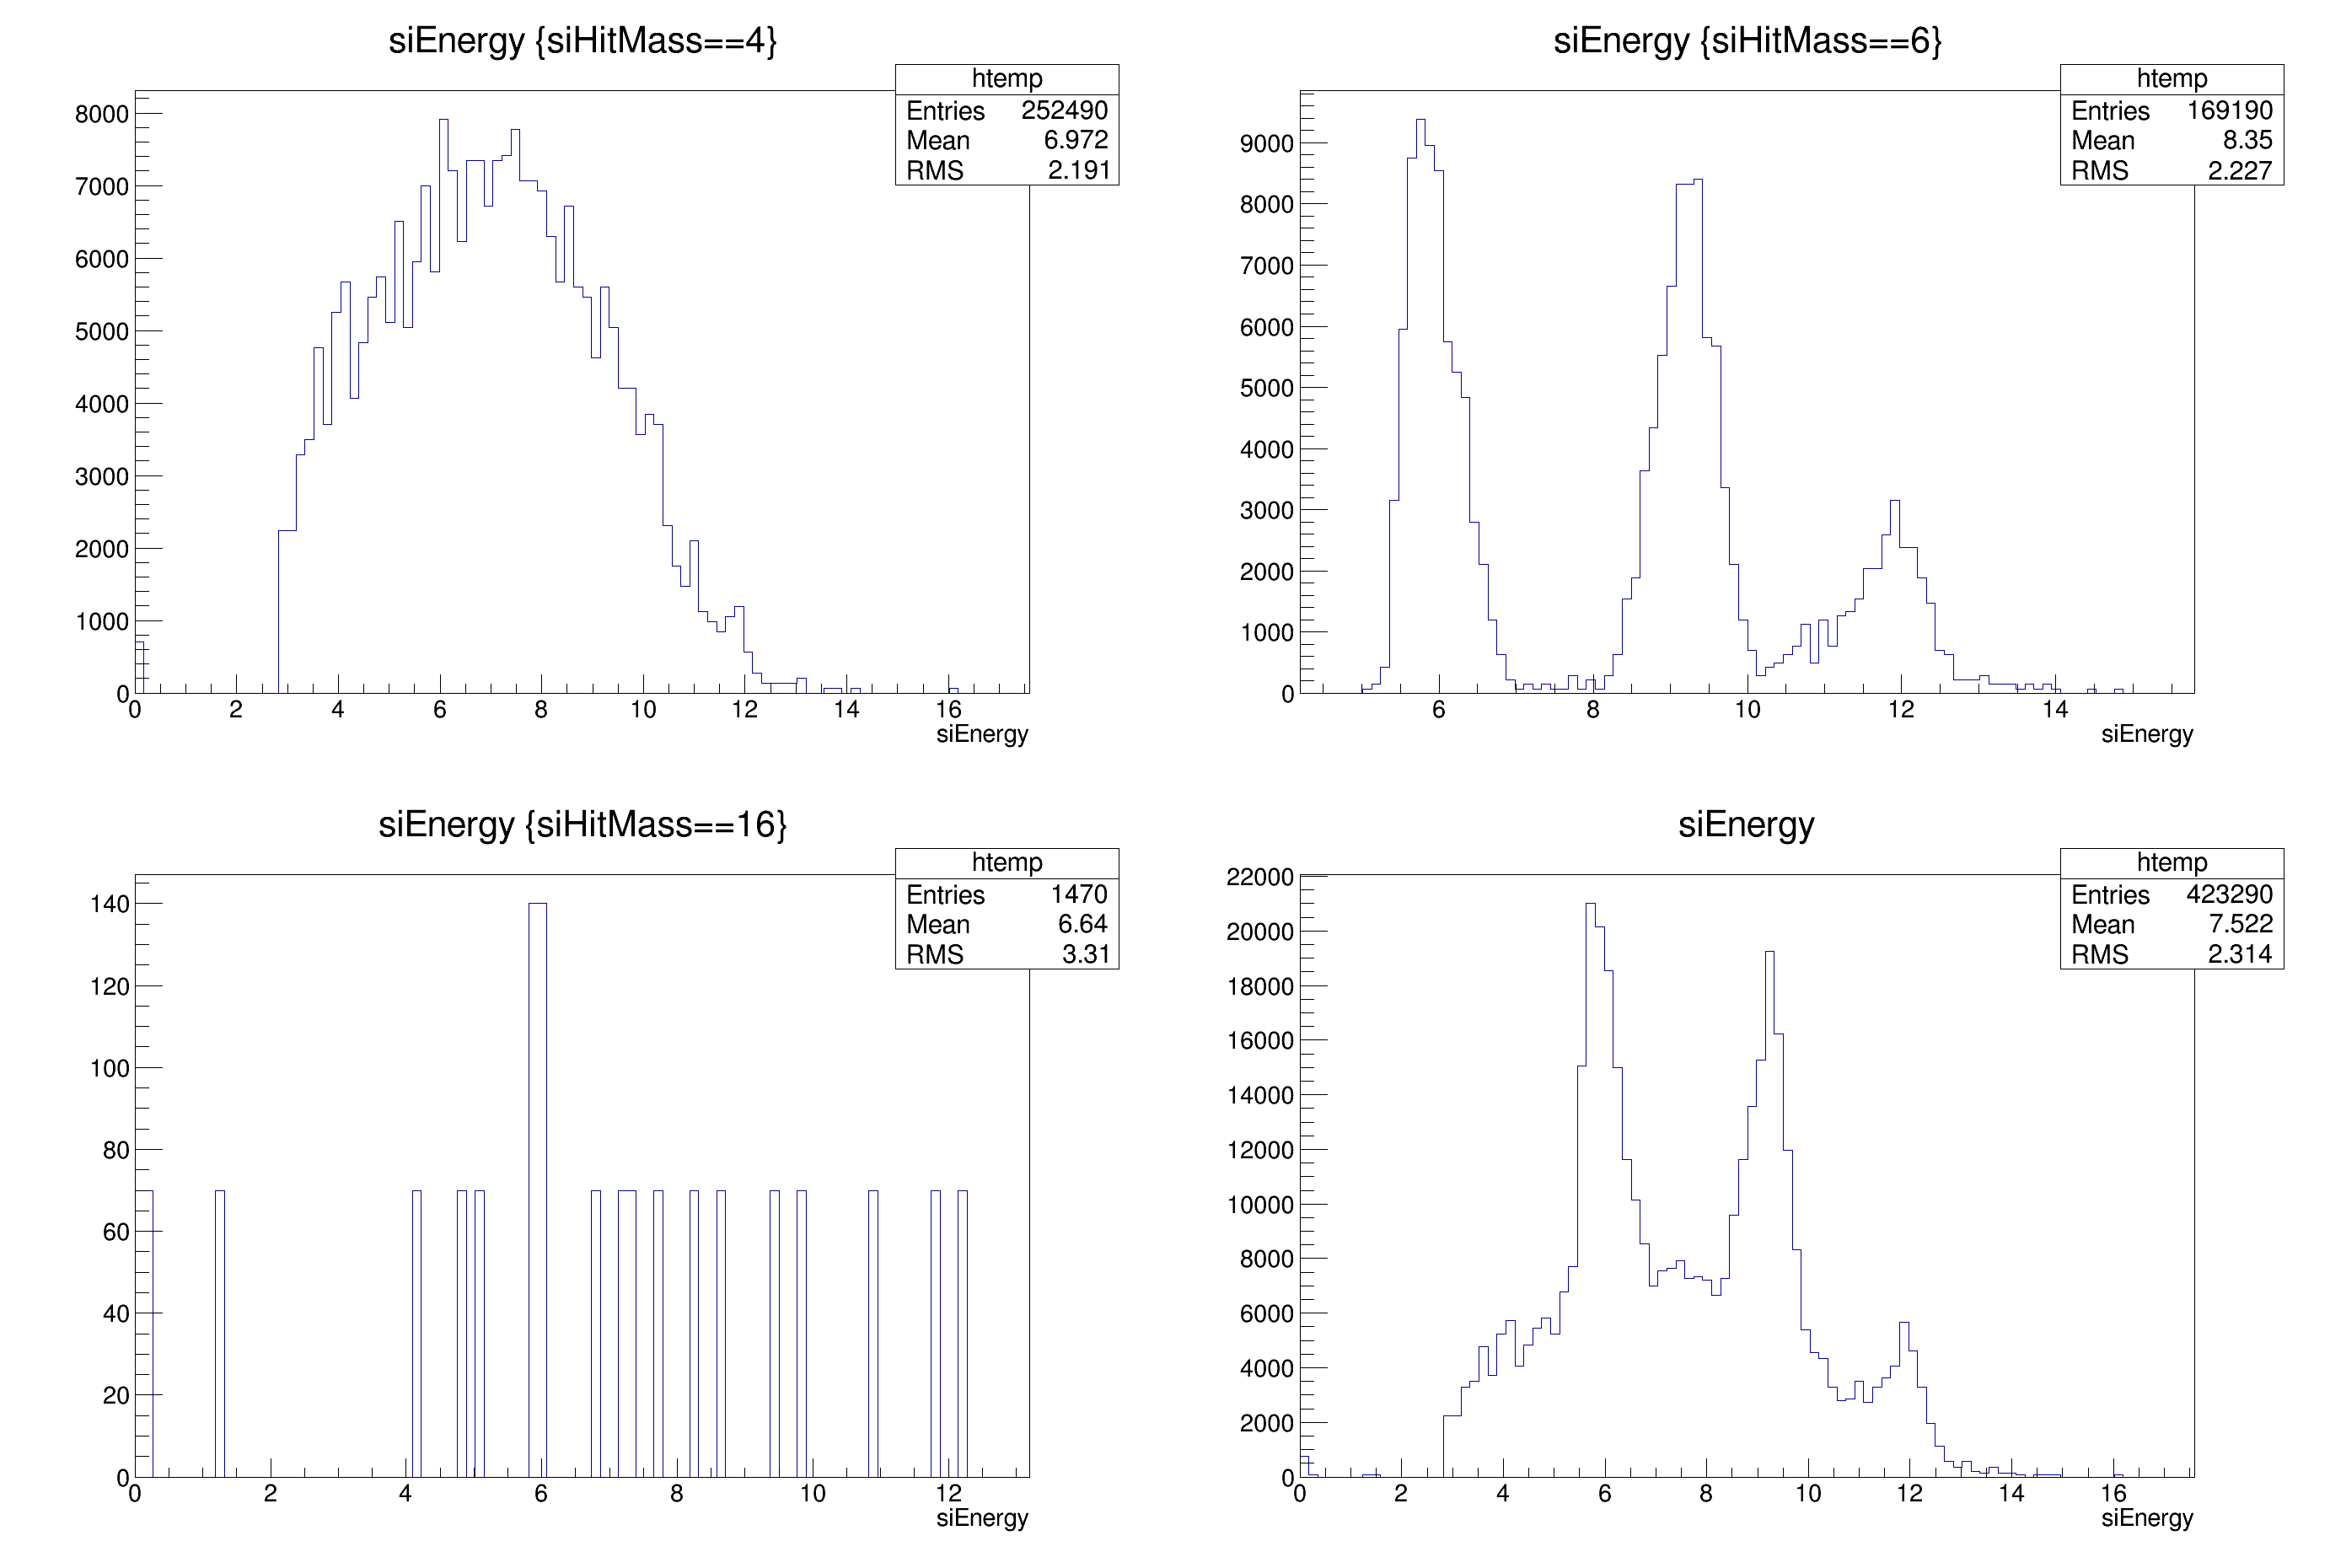

In [90]:
c7

In [86]:
%%rootprint
c7_2 = rootnotes.canvas("Oxygen_det",(696*4,472*4))
c7_2.Divide(2,2)
c7_2.cd(1)
oxygenAlphas.Draw("cmEnergy")
c7_2.cd(2)
oxygenAlphas.Draw("vertexPosition[2]:cmEnergy","","colz")
c7_2.cd(3)
oxygenAlphas.Draw("siEnergy:cmEnergy","","colz")
c7_2.cd(4)
oxygenAlphas.Draw("siHitMass")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Oxygen_det


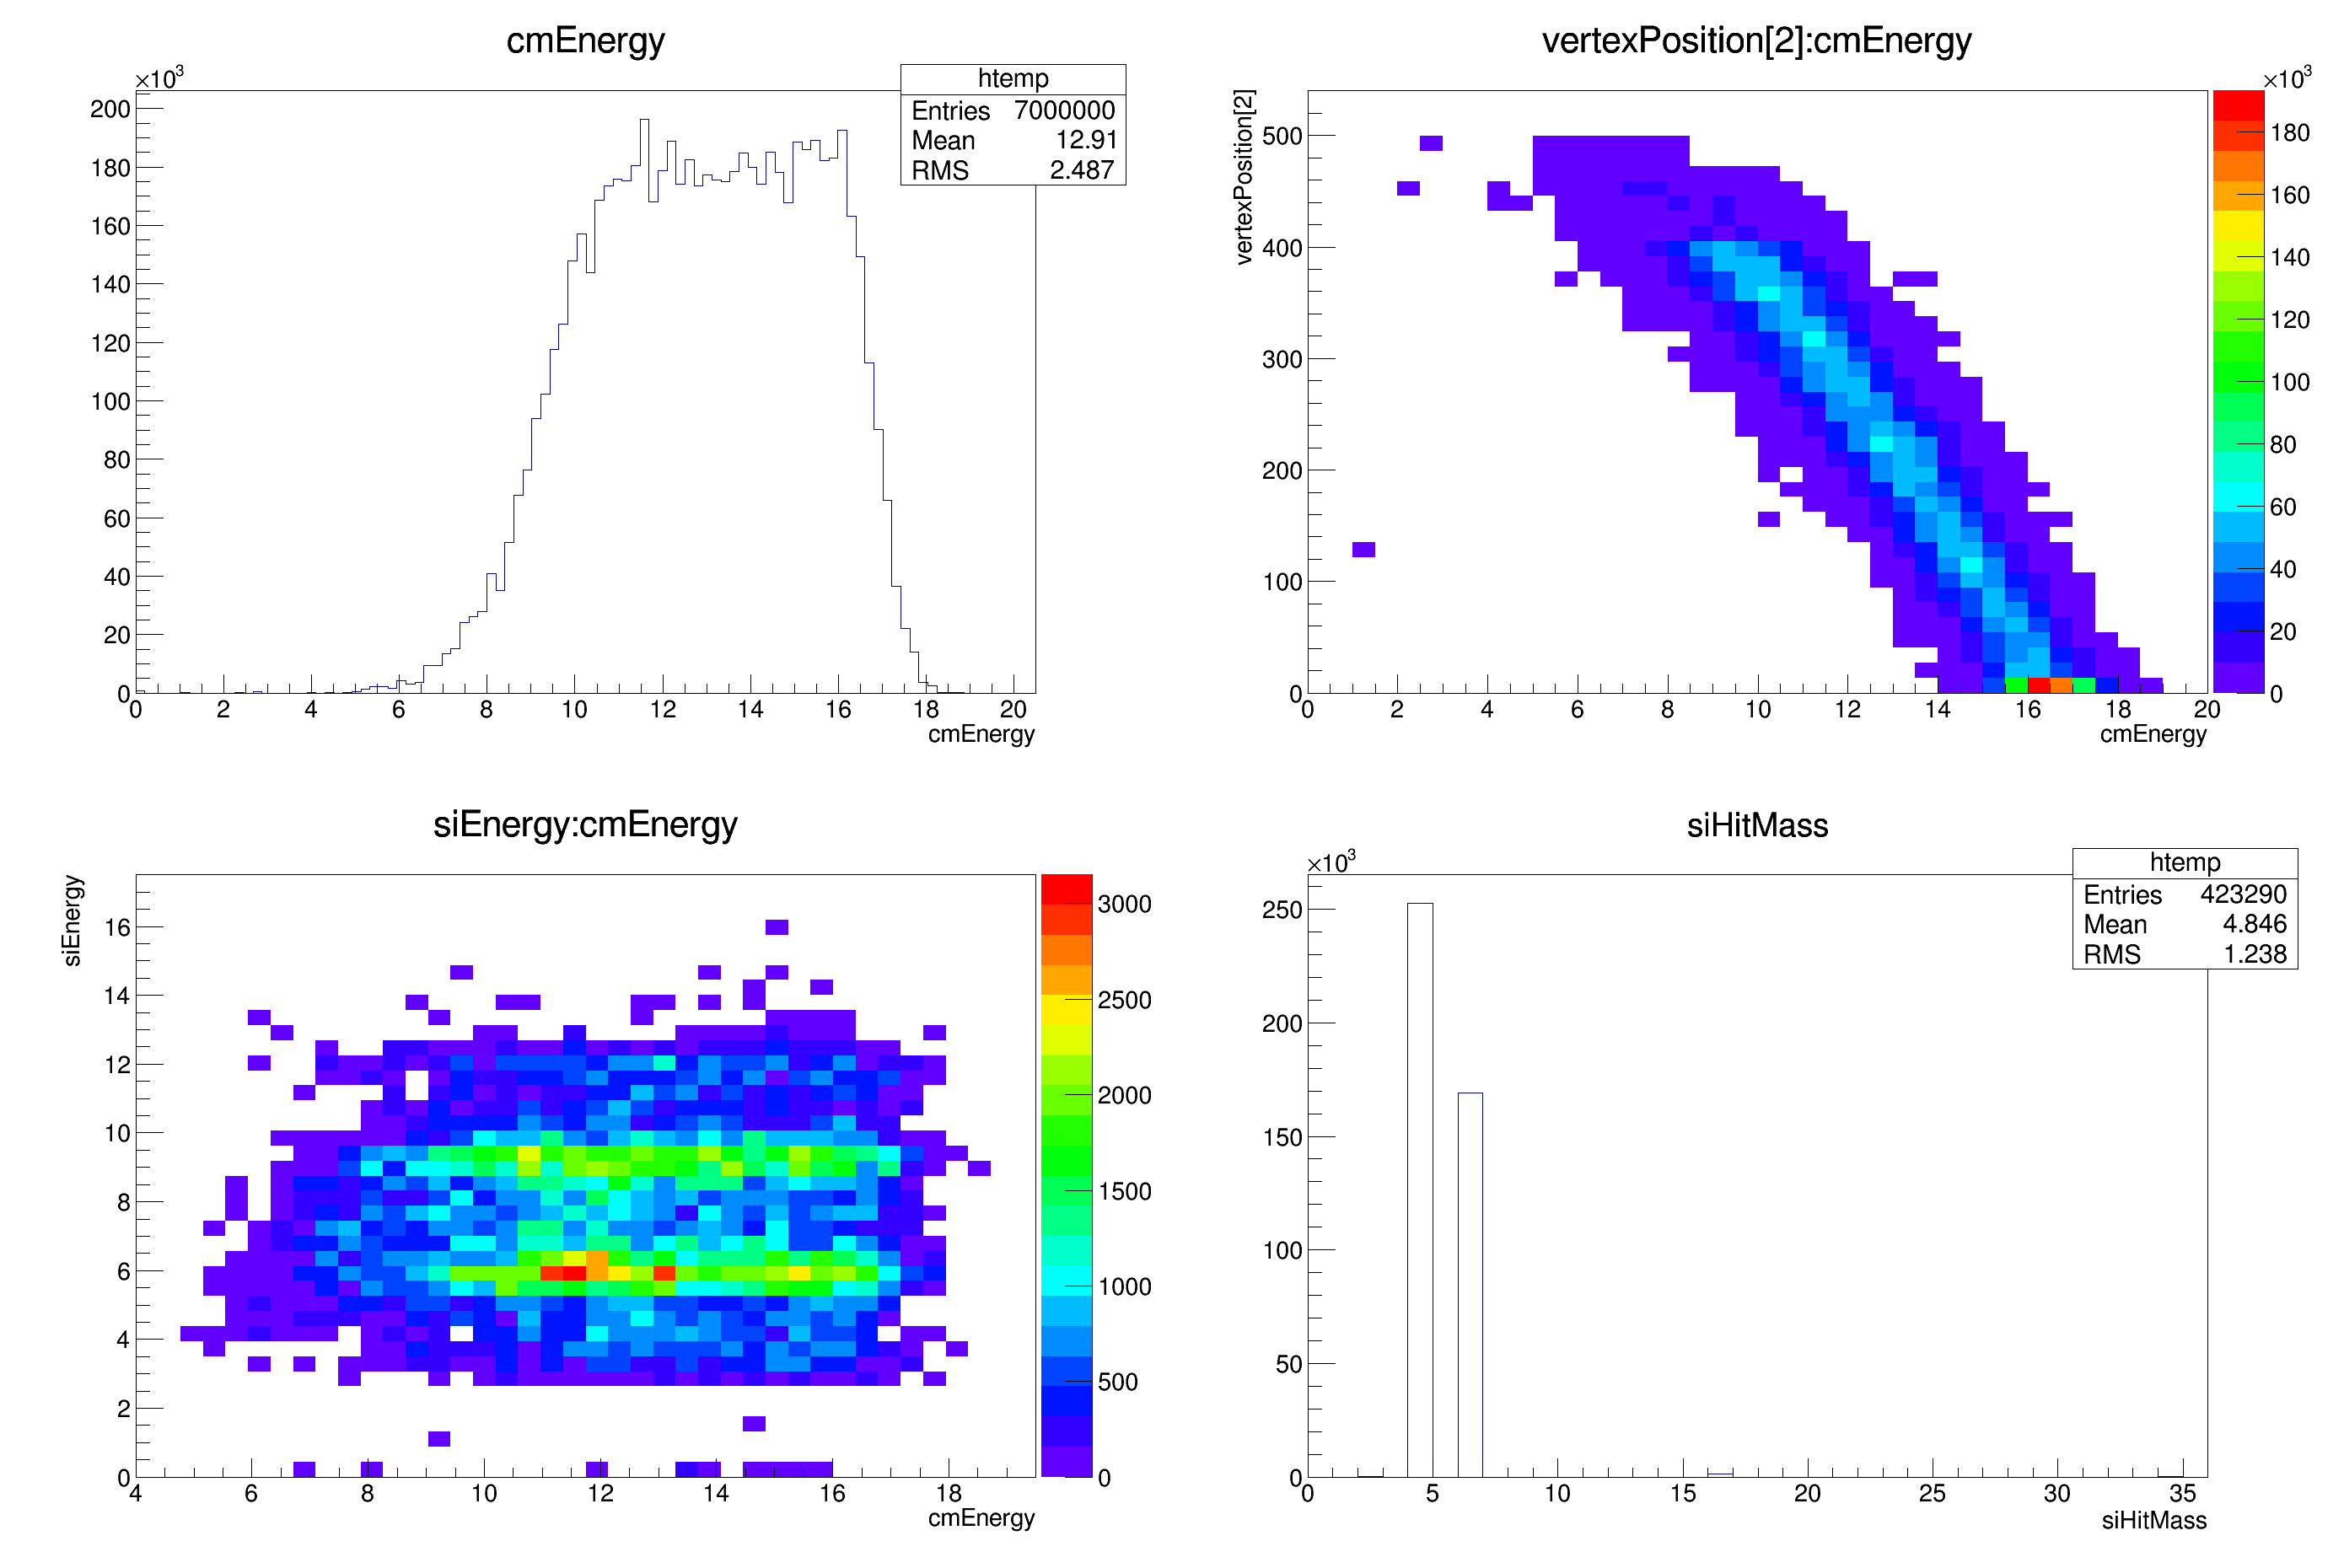

In [87]:
c7_2

$^{6}$He$(^{12}$C,$\alpha)$
====
Inlastic scattering
----

In [104]:
%%rootprint
c8 = rootnotes.canvas("carbon",(692*4,472*4))
c8.Divide(2,2)
c8.cd(1)
carbonAlphas.Draw("siEnergy","siHitMass==4")
c8.cd(2)
carbonAlphas.Draw("siEnergy","siHitMass==6")
c8.cd(3)
carbonAlphas.Draw("siEnergy","siHitMass==12")
c8.cd(4)
carbonAlphas.Draw("siEnergy")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: carbon


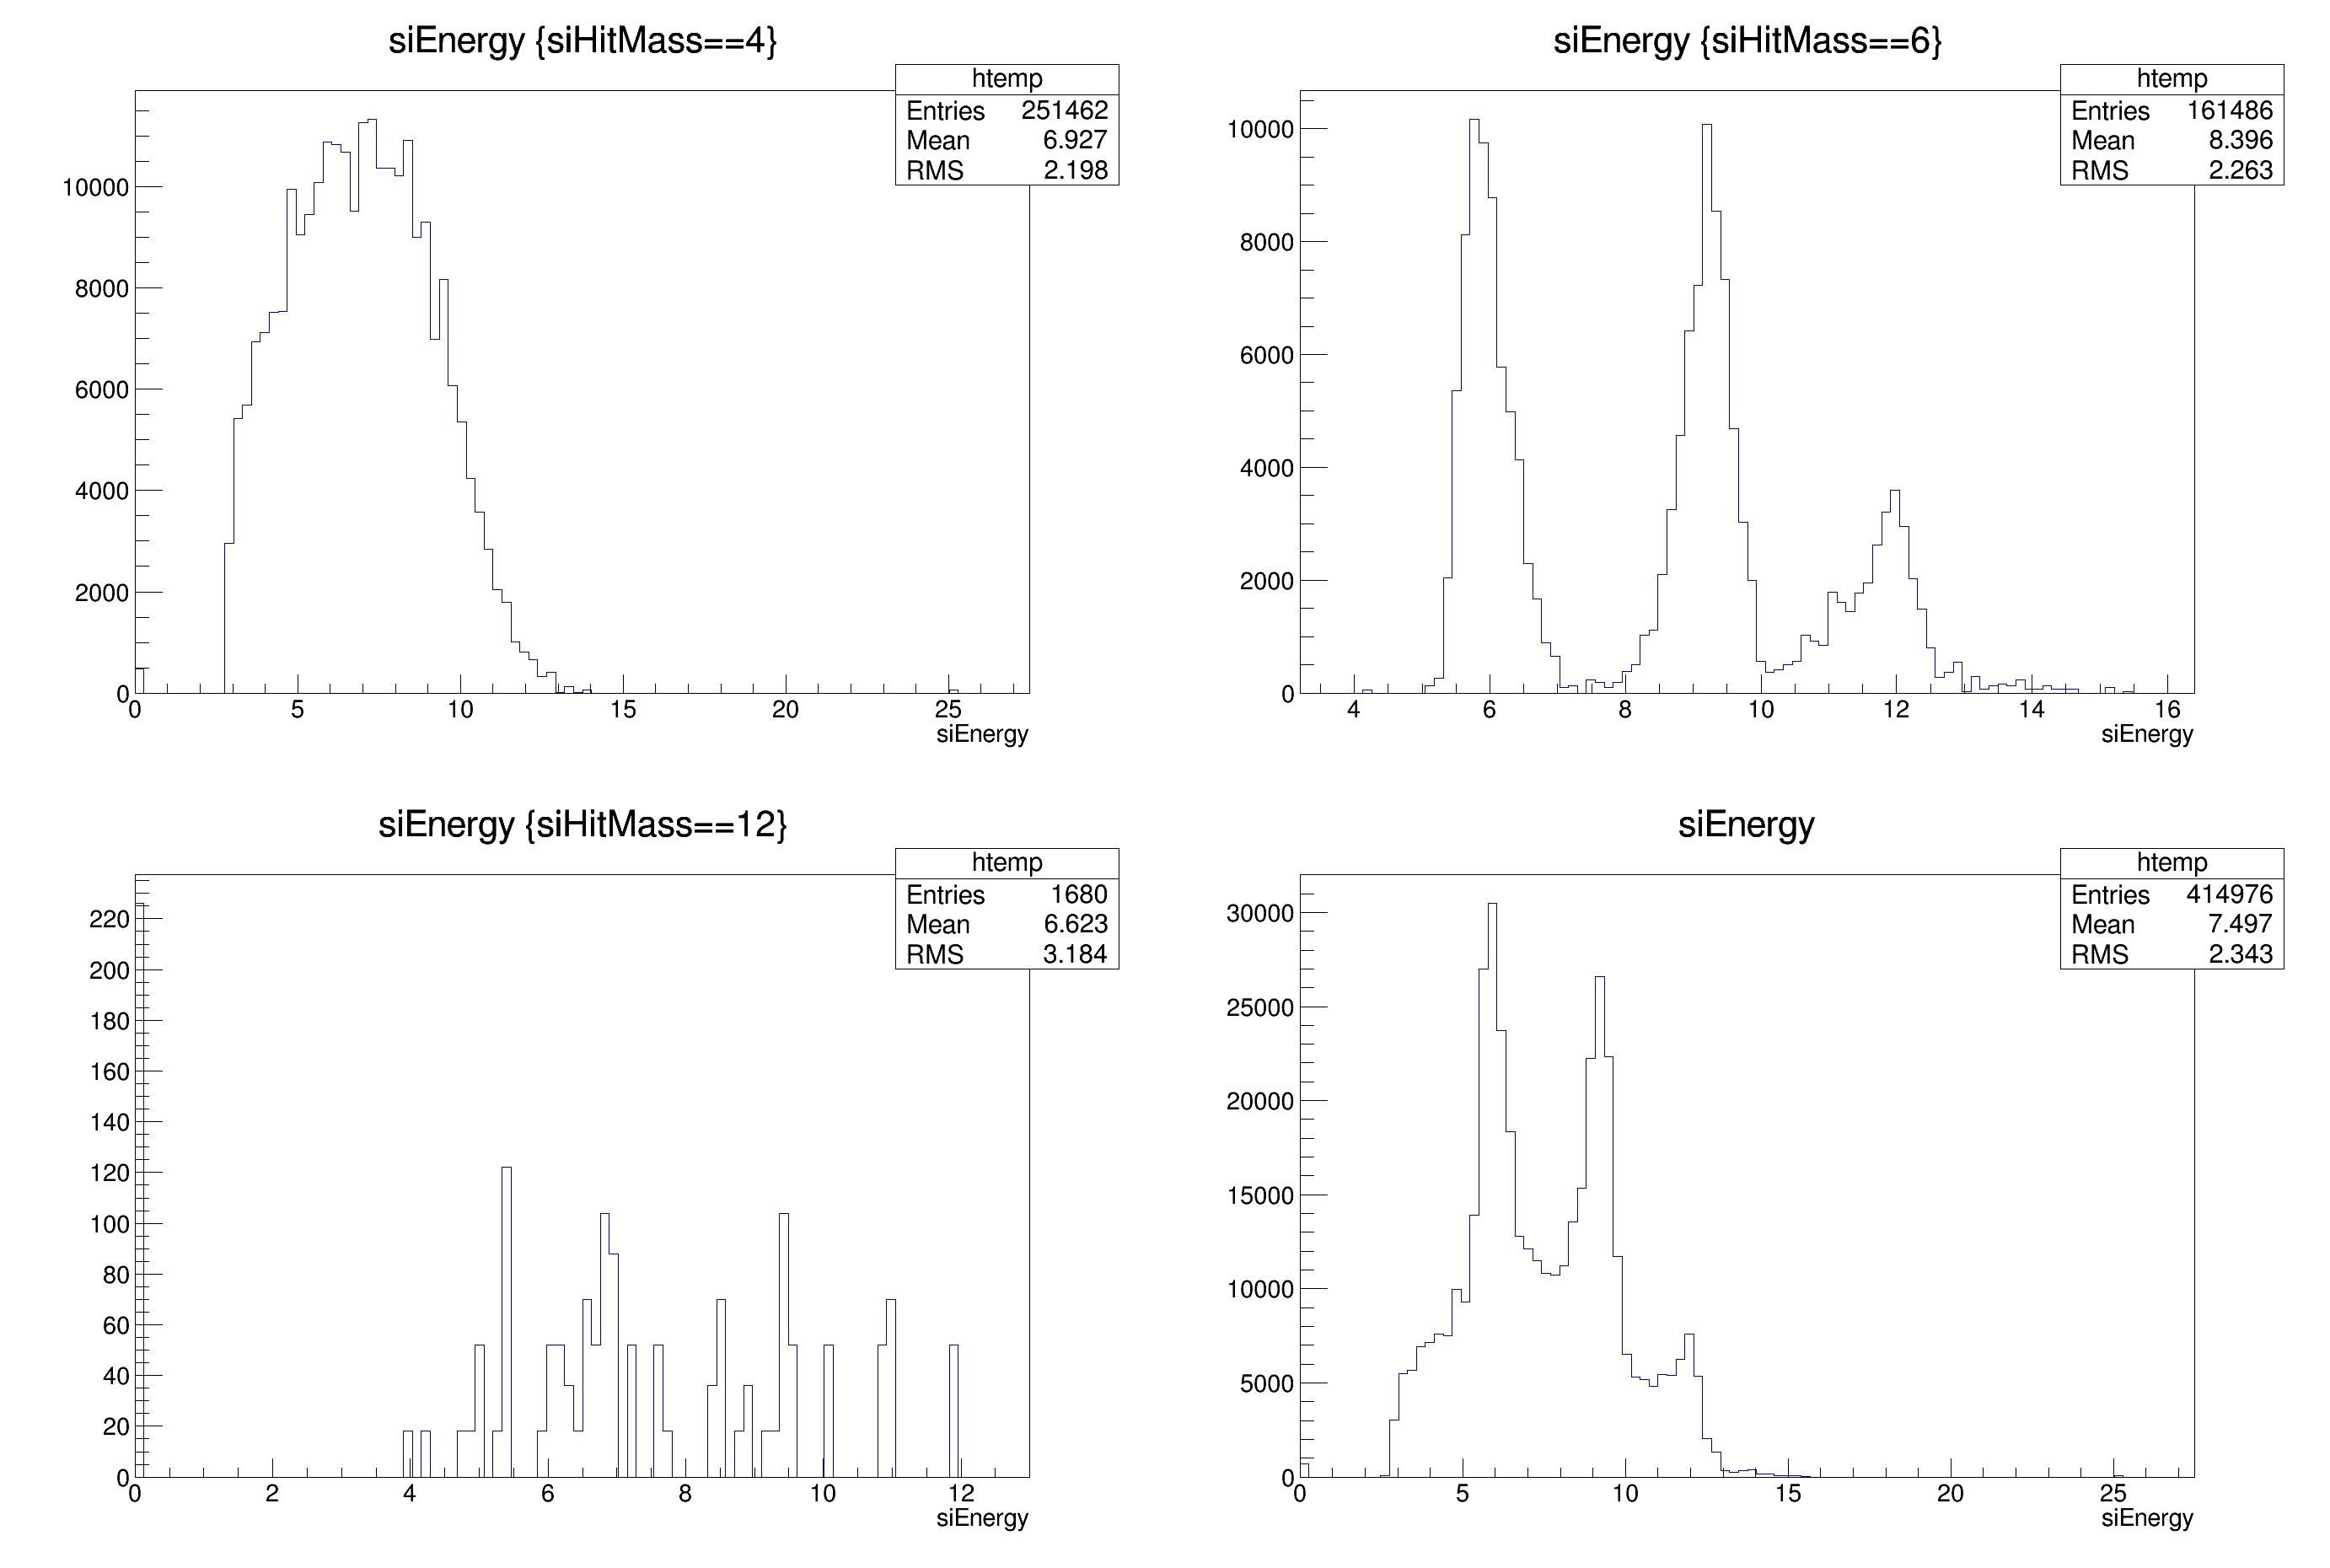

In [105]:
c8

In [106]:
%%rootprint
c8_2 = rootnotes.canvas("carbon_det",(696*4,472*4))
c8_2.Divide(2,2)
c8_2.cd(1)
carbonAlphas.Draw("cmEnergy")
c8_2.cd(2)
carbonAlphas.Draw("vertexPosition[2]:cmEnergy","","colz")
c8_2.cd(3)
carbonAlphas.Draw("siEnergy:cmEnergy","","colz")
c8_2.cd(4)
carbonAlphas.Draw("siHitMass")

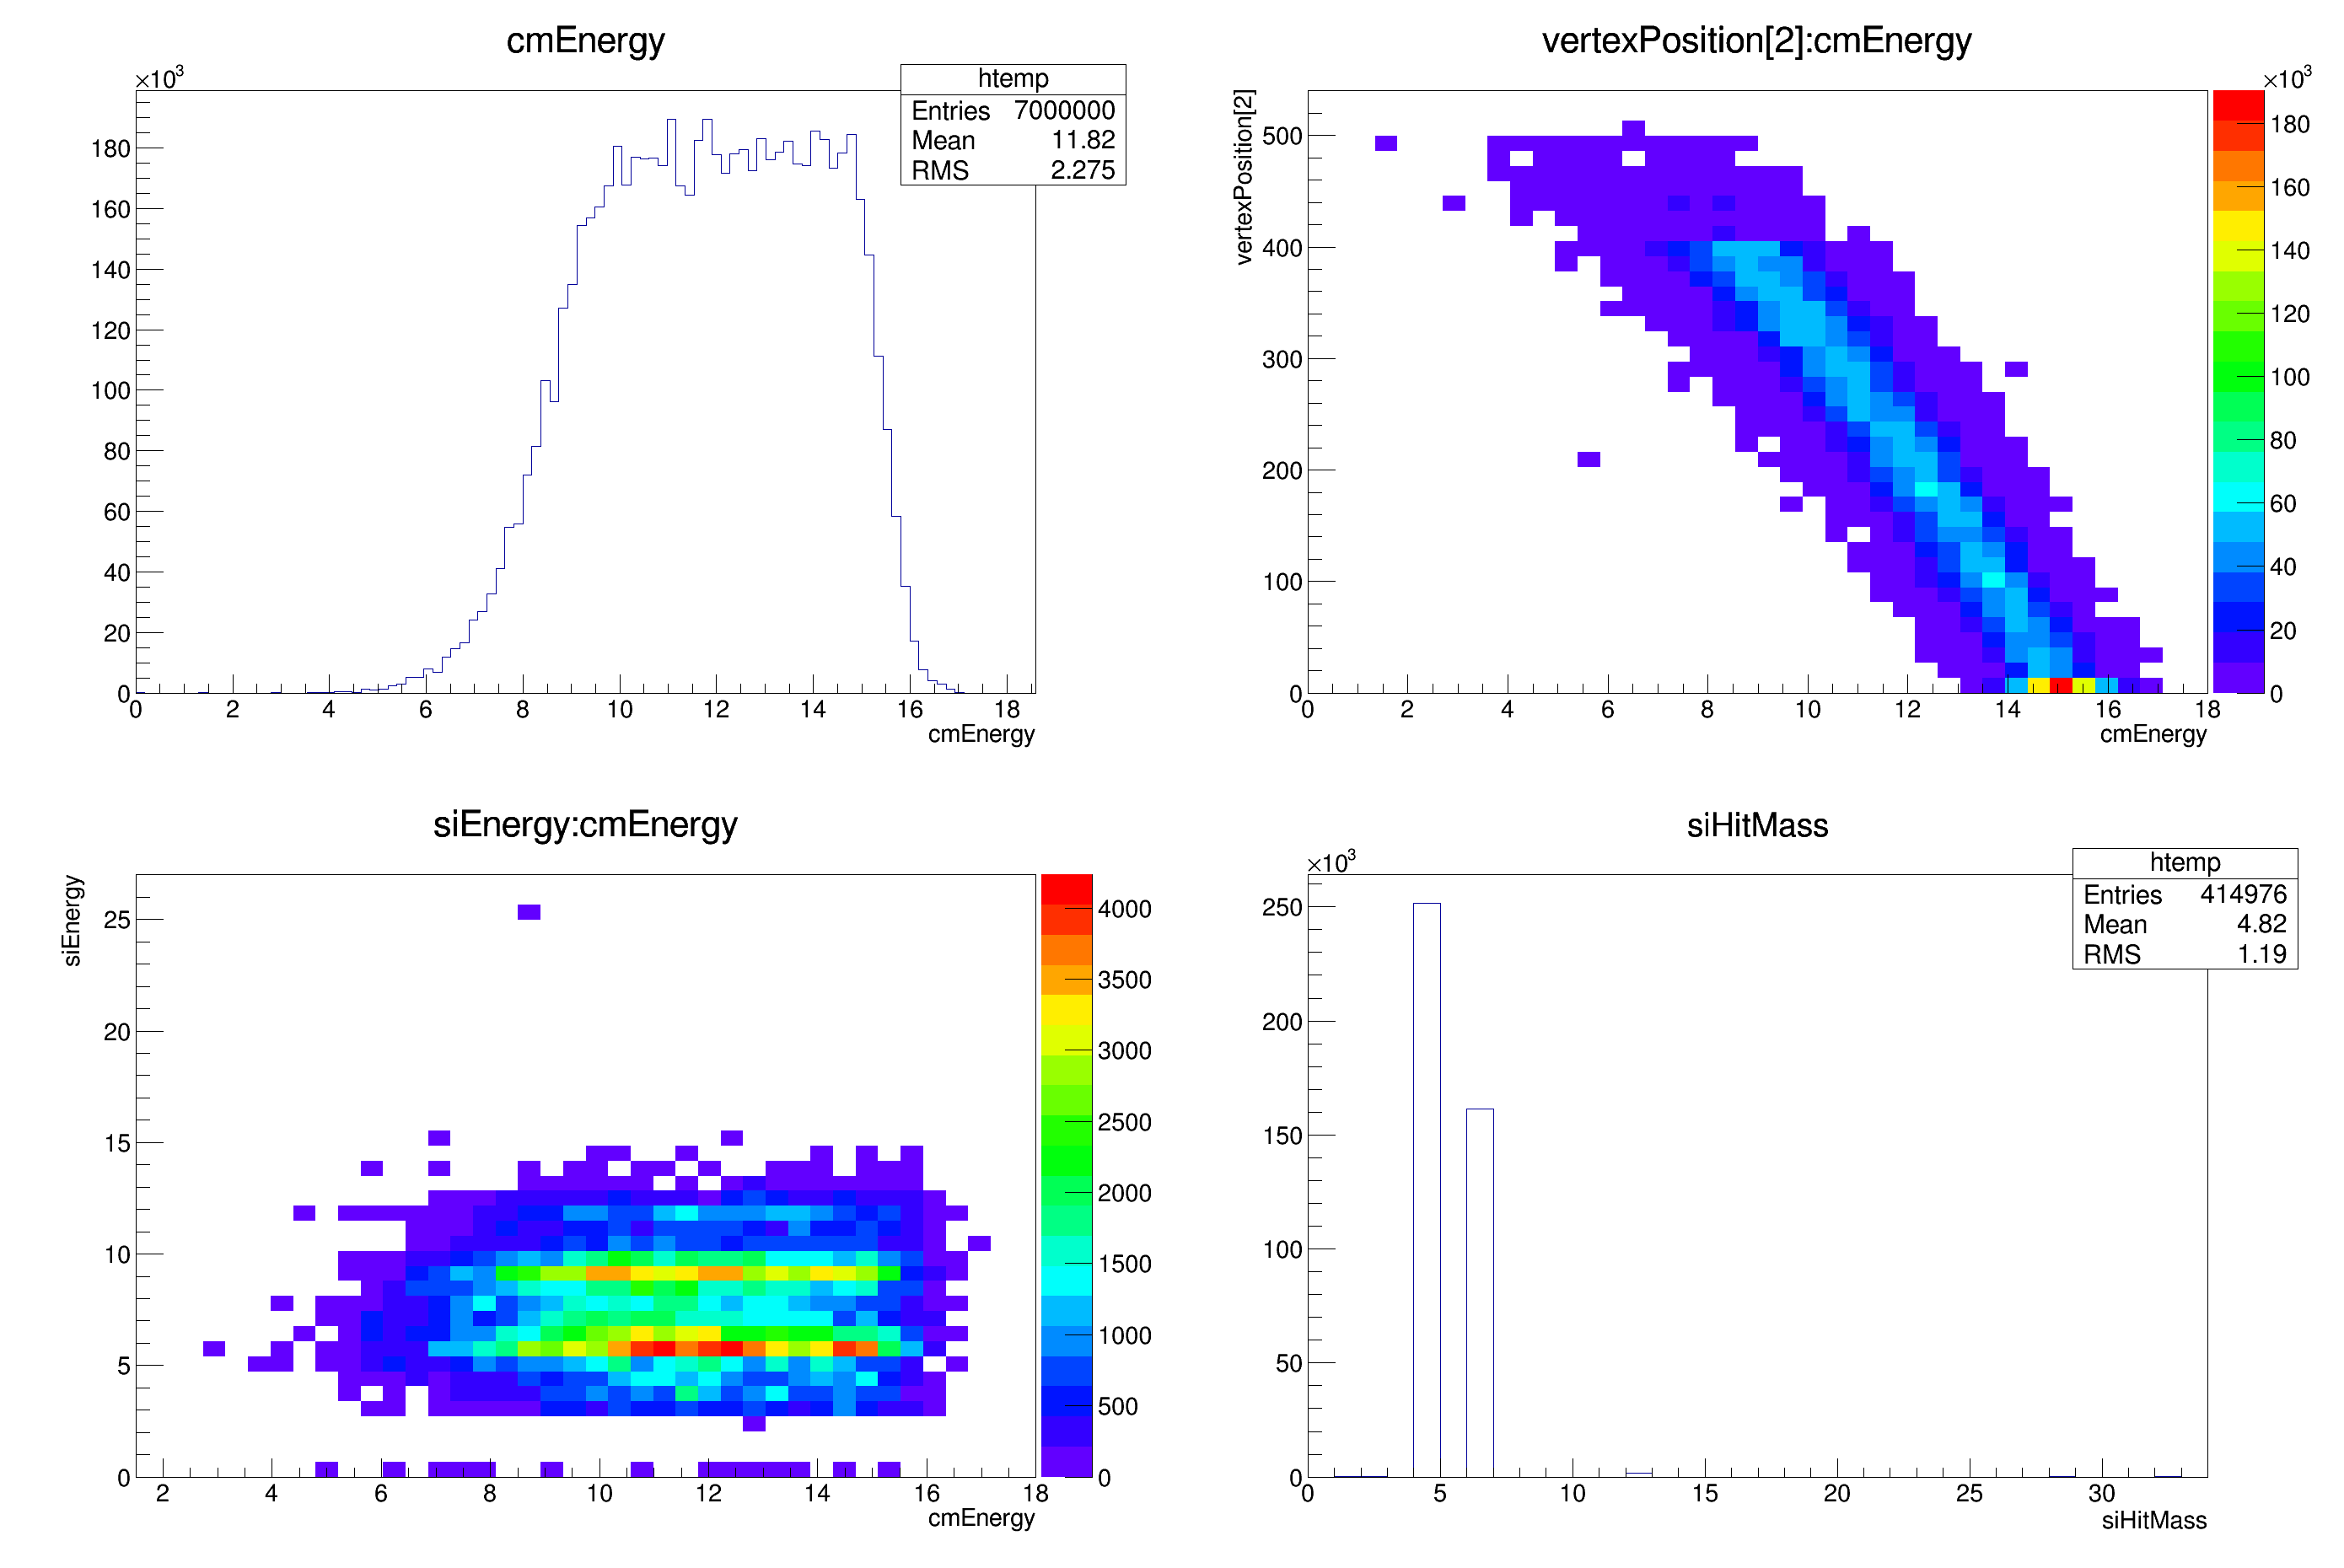

In [107]:
c8_2

To Do:
====
* I am not sure what is left to do.
    * Simulated $^{6}$He on Oxygen and Carbon
* I'll investigate the issue with the detector 3 getting most of the events.
    * I strongly suspect this is due to the way the decay process is defined with the vectors.

What's next?
----
